STIC-B545 : Traitement automatique des corpus
TP 4 : Travail Final
Choix du Sujet : Comment la presse francophone belge a-t-elle abordé la question de la vaccination et de la revaccination à la fin du 19ième siècle en Belgique (Plus particulièrement durant la décennie de 1890's)

Sylviane Van Rymenant (MASTIC)

Keywords sur l'ensemble du corpus :

In [2]:
#Technique pour extraire des bigrams
import os
import yake

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

# Lister les Fichiers
data_path = "../data/camille_vaccination"
files = os.listdir(data_path)

for f in sorted(files)[0:1000]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB421_1899-03-20_01-00002.txt mentions these keywords: Gaston Foveaux, dante moisson, Frère Flamidien, bon Dieu, jeune Gaston, victime d'un, Prèro Flamidien, D'autre part, Sitôt qu'il...
KB_JB421_1899-05-27_01-00003.txt mentions these keywords: conseil communal, loi communale, droit administratif, conseiller communal, c'est qu'il, code pénal, faire partie, bienfaisance publique, conseillers communaux, Conseils communaux, l'intérêt personnel, Droit pénal...
KB_JB421_1899-06-01_01-00003.txt mentions these keywords: forme d'amendement, c'est qu'il, qu'il fut, Pauvre petit, projet Nigra, TRAVAUX PUBLICS, projet d'un, alors qu'il, hernie qu'il...
KB_JB421_1899-11-30_01-00002.txt mentions these keywords: femme exerce, petit commerce, bénéfice devrait, d'hygiène publique, République sud-africaine, gouvernement anglais, supérieur d'hygiène, reine Victoria, loi sanitaire, Belmont c'est, qu'à Belmont...
KB_JB421_1899-12-11_01-00002.txt mentions these keywords: Toussaint Lumineau, qu'il n'est,

In [ ]:
#Technique pour extraire des unigrams
import os
import yake

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

# Lister les Fichiers
data_path = "../data/camille_vaccination"
files = os.listdir(data_path)

for f in sorted(files)[0:1000]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Clustering

In [3]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

import nltk

nltk.download('punkt')

data_path = "../data/camille_vaccination/"
DECADE = '1890'


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#Charger tous les fichiers de la décennie et en créer une liste de textes
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

texts = [open(data_path + f,encoding='utf-8').read() for f in files]

# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)


In [5]:
#Construire la matrice de vecteurs à l'aide de la fonction fit transform

tfidf_vectors = vectorizer.fit_transform(texts)

tfidf_array = tfidf_vectors.toarray()

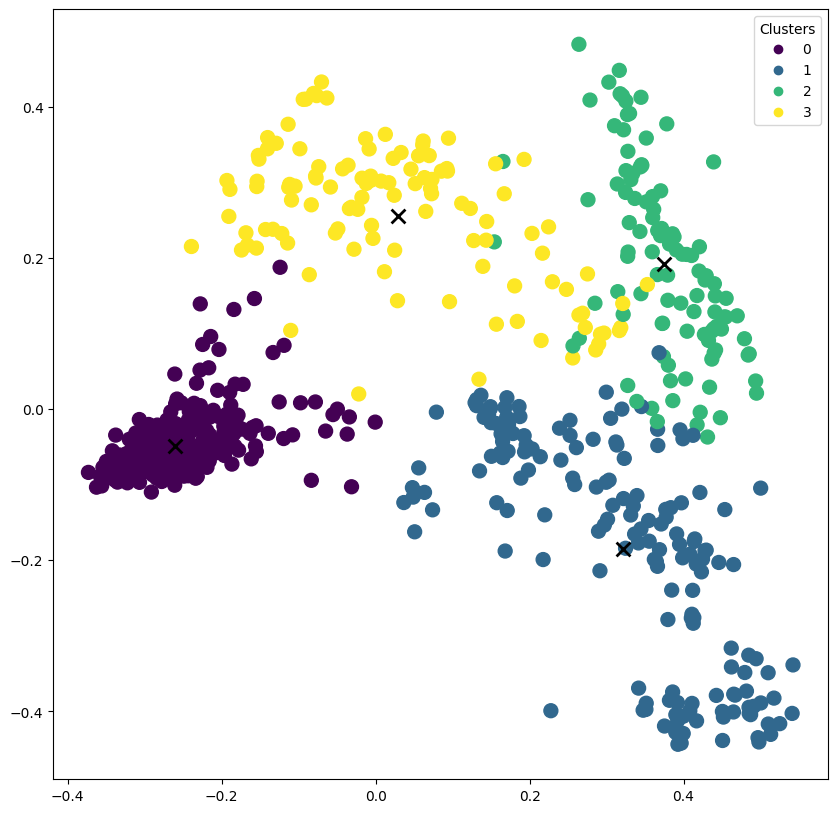

In [6]:
#Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents
#Définir un nombre de clusters
N_CLUSTERS = 4

#Instancier le modèle KMeans et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

#Appliquer le clustering à l'aide de la fonction fit_predict
clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

#Visualiser les clusters

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")


Analyse des clusters

In [7]:
#Cluster 0
import os
import yake

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

# Lister les Fichiers
data_path = "../data/camille_vaccination/"
files ='KB_JB555_1892-10-25_01-00003.txt','KB_JB555_1894-10-15_01-00004.txt','KB_JB555_1895-04-04_01-00003.txt','KB_JB555_1895-10-10_01-00003.txt','KB_JB555_1895-10-13_01-00004.txt','KB_JB555_1896-03-14_01-00003.txt','KB_JB555_1896-04-10_01-00003.txt','KB_JB555_1896-06-26_01-00003.txt','KB_JB555_1897-09-19_01-00003.txt','KB_JB555_1898-03-11_01-00003.txt','KB_JB567_1890-05-09_01-00003.txt','KB_JB567_1891-07-28_01-00003.txt','KB_JB567_1892-02-05_01-00003.txt','KB_JB567_1894-10-25_01-00003.txt','KB_JB567_1896-10-21_01-00003.txt','KB_JB567_1897-04-13_01-00003.txt','KB_JB567_1899-07-06_01-00003.txt','KB_JB638_1890-06-16_01-00003.txt','KB_JB638_1890-07-12_01-00003.txt','KB_JB638_1892-02-05_01-00003.txt','KB_JB638_1892-02-23_01-00003.txt','KB_JB638_1892-03-01_01-00003.txt','KB_JB638_1892-03-15_01-00003.txt','KB_JB638_1892-04-05_01-00003.txt','KB_JB638_1892-04-14_01-00003.txt','KB_JB638_1892-04-15_01-00003.txt','KB_JB638_1892-04-26_01-00003.txt','KB_JB638_1892-05-24_01-00003.txt','KB_JB638_1892-06-23_01-00003.txt','KB_JB638_1892-06-28_01-00003.txt','KB_JB638_1892-07-05_01-00003.txt','KB_JB638_1892-07-12_01-00003.txt','KB_JB638_1892-07-18_01-00003.txt','KB_JB638_1892-07-19_01-00003.txt','KB_JB638_1892-08-03_01-00004.txt','KB_JB638_1892-08-09_01-00003.txt','KB_JB638_1892-08-22_01-00003.txt','KB_JB638_1892-08-23_01-00003.txt','KB_JB638_1892-09-13_01-00003.txt','KB_JB638_1892-09-20_01-00003.txt','KB_JB638_1892-09-27_01-00003.txt','KB_JB638_1892-10-04_01-00003.txt','KB_JB638_1892-10-11_01-00003.txt','KB_JB638_1892-10-18_01-00003.txt','KB_JB638_1892-10-25_01-00003.txt','KB_JB638_1892-11-08_01-00003.txt','KB_JB638_1892-11-14_01-00003.txt','KB_JB638_1892-11-15_01-00003.txt','KB_JB638_1892-11-29_01-00003.txt','KB_JB638_1892-12-05_01-00003.txt','KB_JB638_1892-12-19_01-00003.txt','KB_JB638_1892-12-20_01-00003.txt','KB_JB638_1892-12-26_01-00003.txt','KB_JB638_1893-02-03_01-00004.txt','KB_JB638_1893-02-15_01-00004.txt','KB_JB638_1893-02-27_01-00004.txt','KB_JB638_1893-03-08_01-00004.txt','KB_JB638_1893-03-17_01-00004.txt','KB_JB638_1893-03-24_01-00004.txt','KB_JB638_1893-03-28_01-00003.txt','KB_JB638_1893-04-03_01-00003.txt','KB_JB638_1893-04-11_01-00003.txt','KB_JB638_1893-04-12_01-00003.txt','KB_JB638_1893-04-24_01-00003.txt','KB_JB638_1893-05-12_01-00004.txt','KB_JB638_1893-05-16_01-00003.txt','KB_JB638_1893-06-05_01-00003.txt','KB_JB638_1893-06-12_01-00004.txt','KB_JB638_1893-06-13_01-00003.txt','KB_JB638_1893-06-19_01-00004.txt','KB_JB638_1893-06-23_01-00004.txt','KB_JB638_1893-07-10_01-00004.txt','KB_JB638_1893-07-12_01-00004.txt','KB_JB638_1893-07-17_01-00004.txt','KB_JB638_1893-07-24_01-00004.txt','KB_JB638_1893-08-21_01-00004.txt','KB_JB638_1893-08-28_01-00004.txt','KB_JB638_1893-09-05_01-00003.txt','KB_JB638_1893-09-11_01-00004.txt','KB_JB638_1893-09-18_01-00003.txt','KB_JB638_1893-09-28_01-00003.txt','KB_JB638_1893-12-15_01-00003.txt','KB_JB638_1893-12-24_01-00003.txt','KB_JB638_1893-12-27_01-00004.txt','KB_JB638_1894-01-05_01-00003.txt','KB_JB638_1894-01-11_01-00003.txt','KB_JB638_1894-01-12_01-00003.txt','KB_JB638_1894-01-15_01-00004.txt','KB_JB638_1894-01-17_01-00003.txt','KB_JB638_1894-01-18_01-00003.txt','KB_JB638_1894-01-23_01-00004.txt','KB_JB638_1894-01-25_01-00003.txt','KB_JB638_1894-01-26_01-00003.txt','KB_JB638_1894-01-29_01-00004.txt','KB_JB638_1894-02-05_01-00003.txt','KB_JB638_1894-02-07_01-00004.txt','KB_JB638_1894-02-09_01-00003.txt','KB_JB638_1894-10-15_01-00003.txt','KB_JB638_1898-04-30_01-00003.txt','KB_JB638_1899-01-07_01-00003.txt','KB_JB685_1895-10-20_01-0004.txt','KB_JB729_1896-08-16_01-00003.txt','KB_JB729_1896-10-21_01-00003.txt','KB_JB729_1897-01-06_01-00003.txt','KB_JB729_1898-03-07_01-00003.txt','KB_JB729_1898-09-21_01-00003.txt','KB_JB729_1899-01-10_01-00003.txt','KB_JB837_1894-06-09_01-00003.txt','KB_JB837_1894-10-25_01-00003.txt','KB_JB837_1897-07-18_01-00003.txt','KB_JB837_1898-05-05_01-00003.txt','KB_JB837_1898-05-22_01-00003.txt','KB_JB838_1890-05-09_01-00003.txt','KB_JB838_1896-09-16_01-00003.txt'

for f in sorted(files)[0:1000]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")



KB_JB555_1892-10-25_01-00003.txt mentions these keywords: Léon Daudet, Rente papier, Rente turque, LUTTE ÉLECTORALE, Marché calme, Fonds publics, Grand Prix, Hongrie Rente, lots hongrois...
KB_JB555_1894-10-15_01-00004.txt mentions these keywords: Mensuels Mensuels, départs mensuels, Conseil d'administration, siège social, d'un commissaire, SOCIÉTÉ ANONYME, salle Desmedt, Bi-mensuels Mensuels, l'Office Central, Election d'un, Office Central, Johnston Line...
KB_JB555_1895-04-04_01-00003.txt mentions these keywords: l'avocat général, articles incriminés, articles poursuivis, mais seulement, Marché calme, d'un article, rue Saint...
KB_JB555_1895-10-10_01-00003.txt mentions these keywords: Grand Prix, Marché calme, d'un grand, prix d'entrée, Marché soutenu...
KB_JB555_1895-10-13_01-00004.txt mentions these keywords: Rente papier, FEUILLETON MÉDICAL, l'institut Drouet, fatalement héréditaire, est-elle fatalement, Rente arg, Rente argent, médication antiphymique, tuberculose est-elle...
KB_

In [8]:
#Cluster 1
# Lister les Fichiers
data_path = "../data/camille_vaccination/"
files ='KB_JB421_1899-03-20_01-00002.txt','KB_JB421_1899-05-27_01-00003.txt','KB_JB421_1899-06-01_01-00003.txt','KB_JB421_1899-11-30_01-00002.txt','KB_JB421_1899-12-11_01-00002.txt','KB_JB555_1890-05-10_01-00001.txt','KB_JB555_1890-06-19_01-00002.txt','KB_JB555_1890-07-20_01-00002.txt','KB_JB555_1890-08-13_01-00002.txt','KB_JB555_1890-10-01_01-00002.txt','KB_JB555_1891-01-04_01-00002.txt','KB_JB555_1891-02-16_01-00001.txt','KB_JB555_1891-03-19_01-00001.txt','KB_JB555_1891-03-19_01-00002.txt','KB_JB555_1892-02-05_01-00002.txt','KB_JB555_1892-03-26_01-00002.txt','KB_JB555_1892-07-18_01-00002.txt','KB_JB555_1892-07-22_01-00002.txt','KB_JB555_1892-07-30_01-00002.txt','KB_JB555_1892-09-15_01-00001.txt','KB_JB555_1892-09-19_01-00003.txt','KB_JB555_1893-03-19_01-00005.txt','KB_JB555_1893-04-16_01-00006.txt','KB_JB555_1893-05-17_01-00002.txt','KB_JB555_1893-07-05_01-00001.txt','KB_JB555_1893-07-21_01-00001.txt','KB_JB555_1893-07-23_01-00001.txt','KB_JB555_1893-09-02_01-00001.txt','KB_JB555_1894-01-29_01-00003.txt','KB_JB555_1894-02-22_01-00001.txt','KB_JB555_1894-03-26_01-00002.txt','KB_JB555_1894-05-26_01-00001.txt','KB_JB555_1894-06-09_01-00002.txt','KB_JB555_1894-10-06_01-00001.txt','KB_JB555_1894-10-25_01-00002.txt','KB_JB555_1894-11-17_01-00001.txt','KB_JB555_1894-11-28_01-00001.txt','KB_JB555_1895-02-05_01-00001.txt','KB_JB555_1895-02-20_01-00001.txt','KB_JB555_1895-04-14_01-00001.txt','KB_JB555_1895-04-21_01-00001.txt','KB_JB555_1895-04-21_01-00006.txt','KB_JB555_1895-08-31_01-00002.txt','KB_JB555_1895-09-29_01-00001.txt','KB_JB555_1895-12-26_01-00002.txt','KB_JB555_1896-02-02_01-00001.txt','KB_JB555_1896-02-18_01-00002.txt','KB_JB555_1896-04-06_01-00002.txt','KB_JB555_1896-06-28_01-00006.txt','KB_JB555_1896-08-05_01-00001.txt','KB_JB555_1896-11-09_01-00001.txt','KB_JB555_1897-01-17_01-00005.txt','KB_JB555_1897-01-29_01-00001.txt','KB_JB555_1897-01-31_01-00002.txt','KB_JB555_1897-06-12_01-00002.txt','KB_JB555_1897-06-15_01-00002.txt','KB_JB555_1897-07-28_01-00003.txt','KB_JB555_1897-09-19_01-00001.txt','KB_JB555_1897-12-20_01-00003.txt','KB_JB555_1898-02-28_01-00003.txt','KB_JB555_1898-03-11_01-00001.txt','KB_JB555_1898-03-21_01-00003.txt','KB_JB555_1898-07-07_01-00003.txt','KB_JB555_1898-07-28_01-00001.txt','KB_JB555_1898-08-07_01-00001.txt','KB_JB555_1898-08-14_01-00005.txt','KB_JB555_1898-09-09_01-00001.txt','KB_JB555_1898-12-22_01-00002.txt','KB_JB555_1899-01-13_01-00002.txt','KB_JB555_1899-01-23_01-00003.txt','KB_JB555_1899-02-02_01-00003.txt','KB_JB555_1899-04-29_01-00001.txt','KB_JB555_1899-06-07_01-00001.txt','KB_JB555_1899-06-07_01-00002.txt','KB_JB555_1899-09-09_01-00002.txt','KB_JB555_1899-09-17_01-00006.txt','KB_JB555_1899-09-28_01-00001.txt','KB_JB567_1890-05-08_01-00002.txt','KB_JB567_1890-11-14_01-00002.txt','KB_JB567_1890-11-26_01-00002.txt','KB_JB567_1891-08-05_01-00002.txt','KB_JB567_1891-08-14_01-00001.txt','KB_JB567_1891-10-16_01-00001.txt','KB_JB567_1892-05-03_01-00002.txt','KB_JB567_1892-06-25_01-00002.txt','KB_JB567_1892-07-17_01-00005.txt','KB_JB567_1892-07-19_01-00002.txt','KB_JB567_1892-07-22_01-00002.txt','KB_JB567_1892-07-28_01-00002.txt','KB_JB567_1892-08-28_01-00001.txt','KB_JB567_1892-09-10_01-00001.txt','KB_JB567_1892-09-11_01-00001.txt','KB_JB567_1892-09-12_01-00001.txt','KB_JB567_1892-09-16_01-00001.txt','KB_JB567_1892-09-25_01-00001.txt','KB_JB567_1892-09-30_01-00001.txt','KB_JB567_1892-10-25_01-00002.txt','KB_JB567_1892-12-03_01-00001.txt','KB_JB567_1892-12-30_01-00002.txt','KB_JB567_1893-01-10_01-00002.txt','KB_JB567_1893-02-11_01-00001.txt','KB_JB567_1893-04-09_01-00001.txt','KB_JB567_1893-12-28_01-00001.txt','KB_JB567_1894-01-31_01-00002.txt','KB_JB567_1894-11-08_01-00001.txt','KB_JB567_1895-02-20_01-00002.txt','KB_JB567_1895-03-03_01-00002.txt','KB_JB567_1895-04-08_01-00002.txt','KB_JB567_1895-04-12_01-00002.txt','KB_JB567_1895-05-06_01-00002.txt','KB_JB567_1895-06-11_01-00002.txt','KB_JB567_1895-08-09_01-00002.txt','KB_JB567_1895-08-25_01-00001.txt','KB_JB567_1895-09-30_01-00001.txt','KB_JB567_1896-02-21_01-00001.txt','KB_JB567_1896-08-16_01-00002.txt','KB_JB567_1896-09-05_01-00002.txt','KB_JB567_1897-01-30_01-00002.txt','KB_JB567_1897-05-31_01-00001.txt','KB_JB567_1897-07-28_01-00002.txt','KB_JB567_1897-09-21_01-00002.txt','KB_JB567_1897-10-14_01-00002.txt','KB_JB567_1897-12-05_01-00006.txt','KB_JB567_1898-08-14_01-00001.txt','KB_JB567_1898-08-18_01-00002.txt','KB_JB567_1898-10-27_01-00001.txt','KB_JB567_1898-11-29_01-00001.txt','KB_JB567_1898-12-14_01-00002.txt','KB_JB567_1898-12-18_01-00001.txt','KB_JB567_1899-01-17_01-00001.txt','KB_JB567_1899-01-18_01-00001.txt','KB_JB567_1899-10-11_01-00002.txt','KB_JB567_1899-10-19_01-00001.txt','KB_JB572_1896-02-07_01-00002.txt','KB_JB572_1896-03-16_01-00002.txt','KB_JB572_1896-04-08_01-00002.txt','KB_JB572_1896-04-12_01-00002.txt','KB_JB572_1896-10-15_01-00002.txt','KB_JB572_1897-04-13_01-00003.txt','KB_JB572_1897-05-23_02-00010.txt','KB_JB572_1897-07-14_01-00002.txt','KB_JB572_1897-10-21_01-00001.txt','KB_JB572_1898-02-21_01-00001.txt','KB_JB572_1898-05-12_01-00002.txt','KB_JB572_1898-08-08_01-00001.txt','KB_JB572_1898-08-11_01-00001.txt','KB_JB572_1898-09-03_01-00003.txt','KB_JB572_1898-09-06_01-00001.txt','KB_JB572_1898-09-09_01-00003.txt','KB_JB572_1899-01-11_01-00003.txt','KB_JB572_1899-04-05_01-00002.txt','KB_JB572_1899-05-17_01-00002.txt','KB_JB572_1899-07-25_01-00001.txt','KB_JB572_1899-10-13_01-00001.txt','KB_JB638_1890-05-08_01-00001.txt','KB_JB638_1890-05-12_01-00002.txt','KB_JB638_1890-06-10_01-00002.txt','KB_JB638_1890-07-23_01-00002.txt','KB_JB638_1890-11-17_01-00002.txt','KB_JB638_1890-12-11_01-00001.txt','KB_JB638_1890-12-13_01-00005.txt','KB_JB638_1891-01-21_01-00003.txt','KB_JB638_1891-01-29_01-00005.txt','KB_JB638_1891-03-28_01-00006.txt','KB_JB638_1891-04-18_01-00005.txt','KB_JB638_1891-05-02_01-00009.txt','KB_JB638_1891-08-03_01-00002.txt','KB_JB638_1892-02-23_01-00002.txt','KB_JB638_1892-04-01_01-00002.txt','KB_JB638_1892-04-12_01-00001.txt','KB_JB638_1892-04-19_01-00003.txt','KB_JB638_1892-05-02_01-00002.txt','KB_JB638_1892-05-11_01-00002.txt','KB_JB638_1892-06-10_01-00002.txt','KB_JB638_1892-06-15_01-00003.txt','KB_JB638_1892-07-16_01-00001.txt','KB_JB638_1892-07-16_01-00005.txt','KB_JB638_1892-07-30_01-00002.txt','KB_JB638_1892-07-30_01-00006.txt','KB_JB638_1892-08-13_01-00001.txt','KB_JB638_1892-08-13_01-00005.txt','KB_JB638_1892-08-17_01-00001.txt','KB_JB638_1892-09-10_01-00002.txt','KB_JB638_1892-09-14_01-00002.txt','KB_JB638_1892-09-23_01-00002.txt','KB_JB638_1892-10-29_01-00005.txt','KB_JB638_1892-11-12_01-00005.txt','KB_JB638_1892-12-01_01-00006.txt','KB_JB638_1892-12-12_01-00002.txt','KB_JB638_1892-12-17_01-00002.txt','KB_JB638_1892-12-20_01-00002.txt','KB_JB638_1892-12-29_01-00006.txt','KB_JB638_1893-03-20_01-00002.txt','KB_JB638_1893-04-08_01-00001.txt','KB_JB638_1893-04-08_01-00005.txt','KB_JB638_1893-04-22_01-00010.txt','KB_JB638_1893-05-20_01-00005.txt','KB_JB638_1893-07-07_01-00002.txt','KB_JB638_1893-07-08_01-00002.txt','KB_JB638_1893-07-17_01-00002.txt','KB_JB638_1893-07-19_01-00002.txt','KB_JB638_1893-07-21_01-00001.txt','KB_JB638_1893-07-21_01-00002.txt','KB_JB638_1893-07-29_01-00006.txt','KB_JB638_1893-08-10_01-00003.txt','KB_JB638_1894-02-01_01-00007.txt','KB_JB638_1894-02-15_01-00007.txt','KB_JB638_1894-03-15_01-00002.txt','KB_JB638_1894-06-12_01-00003.txt','KB_JB638_1894-06-14_01-00005.txt','KB_JB638_1894-09-01_01-00002.txt','KB_JB638_1894-10-24_01-00001.txt','KB_JB638_1894-10-31_01-00007.txt','KB_JB638_1894-11-28_01-00003.txt','KB_JB638_1895-02-20_01-00002.txt','KB_JB638_1895-04-08_01-00001.txt','KB_JB638_1896-01-21_01-00002.txt','KB_JB638_1896-03-21_01-00005.txt','KB_JB638_1896-06-17_01-00003.txt','KB_JB638_1896-08-29_01-00002.txt','KB_JB638_1896-10-28_01-00002.txt','KB_JB638_1897-01-13_01-00002.txt','KB_JB638_1897-01-30_01-00006.txt','KB_JB638_1897-02-06_01-00005.txt','KB_JB638_1897-09-10_01-00002.txt','KB_JB638_1897-09-15_01-00002.txt','KB_JB638_1897-10-01_01-00002.txt','KB_JB638_1898-04-14_01-00002.txt','KB_JB638_1898-04-29_01-00002.txt','KB_JB638_1898-05-13_01-00002.txt','KB_JB638_1898-05-23_01-00002.txt','KB_JB638_1898-05-26_01-00002.txt','KB_JB638_1898-06-06_01-00002.txt','KB_JB638_1898-07-29_01-00001.txt','KB_JB638_1898-09-09_01-00002.txt','KB_JB638_1898-09-10_01-00002.txt','KB_JB638_1898-09-16_01-00002.txt','KB_JB638_1898-09-19_01-00002.txt','KB_JB638_1898-09-21_01-00002.txt','KB_JB638_1898-09-22_01-00002.txt','KB_JB638_1898-10-07_01-00002.txt','KB_JB638_1899-01-07_01-00005.txt','KB_JB638_1899-01-13_01-00002.txt','KB_JB638_1899-04-15_01-00002.txt','KB_JB638_1899-05-08_01-00003.txt','KB_JB638_1899-06-07_01-00002.txt','KB_JB638_1899-08-02_01-00001.txt','KB_JB638_1899-09-02_01-00002.txt','KB_JB638_1899-09-09_02-00004.txt','KB_JB638_1899-09-29_01-00002.txt','KB_JB638_1899-11-25_01-00009.txt','KB_JB685_1894-05-25_01-0002.txt','KB_JB685_1894-11-09_01-0002.txt','KB_JB685_1894-11-17_01-0002.txt','KB_JB685_1895-03-28_01-0002.txt','KB_JB685_1895-04-14_01-0001.txt','KB_JB685_1895-04-21_01-0002.txt','KB_JB685_1895-08-27_01-0003.txt','KB_JB685_1895-08-31_01-0002.txt','KB_JB685_1896-02-02_01-0001.txt','KB_JB685_1896-04-02_01-0001.txt','KB_JB685_1896-05-13_01-0001.txt','KB_JB685_1896-05-14_01-0001.txt','KB_JB685_1896-08-05_01-0002.txt','KB_JB685_1896-12-15_01-0001.txt','KB_JB685_1897-09-18_01-0001.txt','KB_JB685_1898-07-09_01-0001.txt','KB_JB685_1898-08-06_01-0002.txt','KB_JB685_1898-09-02_01-0001.txt','KB_JB685_1898-09-20_01-0003.txt','KB_JB685_1899-01-04_01-0003.txt','KB_JB685_1899-03-19_01-0005.txt','KB_JB685_1899-09-09_01-0001.txt','KB_JB685_1899-10-10_01-0002.txt','KB_JB685_1899-12-06_01-0001.txt','KB_JB685_1899-12-11_01-0001.txt','KB_JB729_1895-07-11_01-00002.txt','KB_JB729_1895-08-23_01-00001.txt','KB_JB729_1896-02-04_01-00001.txt','KB_JB729_1896-09-22_01-00001.txt','KB_JB729_1896-10-25_01-00006.txt','KB_JB729_1897-01-01_01-00001.txt','KB_JB729_1897-04-13_01-00001.txt','KB_JB729_1897-06-13_01-00001.txt','KB_JB729_1897-12-15_01-00001.txt','KB_JB729_1898-04-04_01-00001.txt','KB_JB729_1898-07-24_01-00002.txt','KB_JB729_1898-08-07_01-00002.txt','KB_JB729_1898-12-30_01-00001.txt','KB_JB729_1899-01-18_01-00001.txt','KB_JB729_1899-02-05_01-00002.txt','KB_JB729_1899-06-24_01-00001.txt','KB_JB729_1899-09-09_01-00002.txt','KB_JB729_1899-09-10_01-00002.txt','KB_JB729_1899-11-14_01-00002.txt','KB_JB837_1891-01-26_01-00002.txt','KB_JB837_1892-02-06_01-00002.txt','KB_JB837_1892-03-10_01-00003.txt','KB_JB837_1892-03-28_01-00003.txt','KB_JB837_1892-06-24_01-00002.txt','KB_JB837_1892-10-10_01-00003.txt','KB_JB837_1893-03-13_01-00002.txt','KB_JB837_1894-02-26_01-00001.txt','KB_JB837_1894-10-24_01-00002.txt','KB_JB837_1894-10-26_01-00001.txt','KB_JB837_1894-10-27_01-00002.txt','KB_JB837_1895-02-20_01-00002.txt','KB_JB837_1896-04-06_01-00003.txt','KB_JB837_1896-06-08_01-00003.txt','KB_JB837_1896-08-21_01-00002.txt','KB_JB837_1896-09-16_01-00001.txt','KB_JB837_1896-12-06_01-00006.txt','KB_JB837_1897-05-09_02-00002.txt','KB_JB837_1897-07-18_01-00005.txt','KB_JB837_1897-10-02_01-00002.txt','KB_JB837_1897-10-03_01-00002.txt','KB_JB837_1897-11-17_01-00001.txt','KB_JB837_1897-12-27_01-00003.txt','KB_JB837_1898-03-08_01-00001.txt','KB_JB837_1898-04-11_01-00001.txt','KB_JB837_1898-08-02_01-00002.txt','KB_JB837_1898-08-04_01-00002.txt','KB_JB837_1898-08-06_01-00002.txt','KB_JB837_1898-08-07_01-00002.txt','KB_JB837_1898-09-15_01-00002.txt','KB_JB837_1898-09-19_01-00002.txt','KB_JB837_1898-10-08_01-00002.txt','KB_JB837_1899-04-16_01-00002.txt','KB_JB837_1899-09-04_01-00003.txt','KB_JB837_1899-09-11_01-00003.txt','KB_JB837_1899-10-11_01-00002.txt','KB_JB838_1890-06-16_01-00003.txt','KB_JB838_1890-10-31_01-00001.txt','KB_JB838_1890-11-21_01-00001.txt','KB_JB838_1890-11-24_01-00002.txt','KB_JB838_1891-02-24_01-00002.txt','KB_JB838_1891-07-18_01-00001.txt','KB_JB838_1892-02-24_01-00002.txt','KB_JB838_1892-02-25_01-00003.txt','KB_JB838_1892-10-01_01-00002.txt','KB_JB838_1892-12-08_01-00006.txt','KB_JB838_1893-05-18_01-00005.txt','KB_JB838_1893-10-30_01-00001.txt','KB_JB838_1894-02-14_01-00005.txt','KB_JB838_1894-09-13_01-00005.txt','KB_JB838_1894-10-25_01-00005.txt','KB_JB838_1895-02-16_01-00002.txt','KB_JB838_1895-03-25_01-00001.txt','KB_JB838_1895-08-15_01-00001.txt','KB_JB838_1895-10-29_01-00002.txt','KB_JB838_1896-02-10_01-00003.txt','KB_JB838_1896-05-27_01-00006.txt','KB_JB838_1896-07-23_01-00006.txt','KB_JB838_1896-07-29_01-00006.txt','KB_JB838_1896-12-13_01-00001.txt','KB_JB838_1897-02-11_01-00007.txt','KB_JB838_1897-04-12_01-00003.txt','KB_JB838_1897-09-15_01-00005.txt','KB_JB838_1897-09-15_01-00006.txt','KB_JB838_1897-10-01_01-00006.txt','KB_JB838_1898-02-26_01-00002.txt','KB_JB838_1898-03-10_01-00001.txt','KB_JB838_1898-08-07_01-00001.txt','KB_JB838_1898-08-24_01-00002.txt','KB_JB838_1898-09-02_01-00001.txt'

for f in sorted(files)[0:1000]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")


KB_JB421_1899-03-20_01-00002.txt mentions these keywords: Gaston Foveaux, dante moisson, Frère Flamidien, bon Dieu, jeune Gaston, victime d'un, Prèro Flamidien, D'autre part, Sitôt qu'il...
KB_JB421_1899-05-27_01-00003.txt mentions these keywords: conseil communal, loi communale, droit administratif, conseiller communal, c'est qu'il, code pénal, faire partie, bienfaisance publique, conseillers communaux, Conseils communaux, l'intérêt personnel, Droit pénal...
KB_JB421_1899-06-01_01-00003.txt mentions these keywords: forme d'amendement, c'est qu'il, qu'il fut, Pauvre petit, projet Nigra, TRAVAUX PUBLICS, projet d'un, alors qu'il, hernie qu'il...
KB_JB421_1899-11-30_01-00002.txt mentions these keywords: femme exerce, petit commerce, bénéfice devrait, d'hygiène publique, République sud-africaine, gouvernement anglais, supérieur d'hygiène, reine Victoria, loi sanitaire, Belmont c'est, qu'à Belmont...
KB_JB421_1899-12-11_01-00002.txt mentions these keywords: Toussaint Lumineau, qu'il n'est,

In [9]:
#Cluster 2
# Lister les Fichiers
data_path = "../data/camille_vaccination/"
files ='KB_JB638_1892-02-16_01-00004.txt','KB_JB638_1892-02-18_01-00007.txt','KB_JB638_1892-02-27_01-00010.txt','KB_JB638_1892-02-29_01-00004.txt','KB_JB638_1892-03-02_01-00004.txt','KB_JB638_1892-03-12_01-00006.txt','KB_JB638_1892-03-17_01-00007.txt','KB_JB638_1892-04-08_01-00003.txt','KB_JB638_1892-04-09_01-00006.txt','KB_JB638_1892-04-16_01-00006.txt','KB_JB638_1892-04-23_01-00006.txt','KB_JB638_1892-04-28_01-00006.txt','KB_JB638_1892-04-29_01-00004.txt','KB_JB638_1892-05-02_01-00004.txt','KB_JB638_1892-05-03_01-00008.txt','KB_JB638_1892-05-05_01-00006.txt','KB_JB638_1892-05-10_01-00004.txt','KB_JB638_1892-05-12_01-00006.txt','KB_JB638_1892-05-14_01-00006.txt','KB_JB638_1892-05-16_01-00004.txt','KB_JB638_1892-05-19_01-00007.txt','KB_JB638_1892-05-21_01-00009.txt','KB_JB638_1892-05-28_01-00009.txt','KB_JB638_1892-05-30_01-00004.txt','KB_JB638_1892-06-10_01-00004.txt','KB_JB638_1892-06-15_01-00004.txt','KB_JB638_1892-06-16_01-00005.txt','KB_JB638_1892-06-18_01-00006.txt','KB_JB638_1892-06-18_01-00014.txt','KB_JB638_1892-06-20_01-00004.txt','KB_JB638_1892-06-25_01-00006.txt','KB_JB638_1892-06-27_01-00004.txt','KB_JB638_1892-07-01_01-00004.txt','KB_JB638_1892-07-02_01-00006.txt','KB_JB638_1892-07-04_01-00004.txt','KB_JB638_1892-07-07_01-00005.txt','KB_JB638_1892-07-08_01-00004.txt','KB_JB638_1892-07-16_01-00006.txt','KB_JB638_1892-07-20_01-00004.txt','KB_JB638_1892-07-21_01-00005.txt','KB_JB638_1892-07-23_01-00009.txt','KB_JB638_1892-07-25_01-00004.txt','KB_JB638_1892-07-26_01-00004.txt','KB_JB638_1892-08-08_01-00004.txt','KB_JB638_1892-08-11_01-00006.txt','KB_JB638_1892-08-13_01-00006.txt','KB_JB638_1892-08-18_01-00005.txt','KB_JB638_1892-08-20_01-00006.txt','KB_JB638_1892-08-27_01-00006.txt','KB_JB638_1892-09-03_01-00006.txt','KB_JB638_1892-09-05_01-00004.txt','KB_JB638_1892-09-06_01-00004.txt','KB_JB638_1892-09-08_01-00005.txt','KB_JB638_1892-09-10_01-00006.txt','KB_JB638_1892-09-12_01-00004.txt','KB_JB638_1892-09-17_01-00006.txt','KB_JB638_1892-09-19_01-00004.txt','KB_JB638_1892-09-29_01-00007.txt','KB_JB638_1892-10-01_01-00010.txt','KB_JB638_1892-10-03_01-00004.txt','KB_JB638_1892-10-06_01-00007.txt','KB_JB638_1892-10-08_01-00006.txt','KB_JB638_1892-10-10_01-00004.txt','KB_JB638_1892-10-12_01-00004.txt','KB_JB638_1892-10-15_01-00006.txt','KB_JB638_1892-10-24_01-00004.txt','KB_JB638_1892-10-29_01-00006.txt','KB_JB638_1892-11-03_01-00007.txt','KB_JB638_1892-11-05_01-00006.txt','KB_JB638_1892-11-07_01-00003.txt','KB_JB638_1892-11-09_01-00004.txt','KB_JB638_1892-11-10_01-00007.txt','KB_JB638_1892-11-12_01-00006.txt','KB_JB638_1892-11-17_01-00007.txt','KB_JB638_1892-11-21_01-00004.txt','KB_JB638_1892-11-24_01-00007.txt','KB_JB638_1892-12-10_01-00006.txt','KB_JB638_1892-12-12_01-00004.txt','KB_JB638_1892-12-15_01-00006.txt','KB_JB638_1892-12-17_01-00009.txt','KB_JB638_1892-12-22_01-00007.txt','KB_JB638_1892-12-27_01-00004.txt','KB_JB638_1893-01-05_01-00007.txt','KB_JB638_1893-01-07_01-00006.txt','KB_JB638_1893-01-09_01-00004.txt','KB_JB638_1893-01-17_01-00004.txt','KB_JB638_1893-01-19_01-00007.txt','KB_JB638_1893-01-21_01-00006.txt','KB_JB638_1893-01-26_01-00007.txt','KB_JB638_1893-01-30_01-00004.txt','KB_JB638_1893-02-02_01-00007.txt','KB_JB638_1893-02-04_01-00010.txt','KB_JB638_1893-02-09_01-00007.txt','KB_JB638_1893-02-11_01-00004.txt','KB_JB638_1893-02-14_01-00004.txt','KB_JB638_1893-02-16_01-00005.txt','KB_JB638_1893-02-18_01-00006.txt','KB_JB638_1893-02-20_01-00004.txt','KB_JB638_1893-02-23_01-00007.txt','KB_JB638_1893-03-02_01-00005.txt','KB_JB638_1893-03-04_01-00011.txt','KB_JB638_1893-03-21_01-00004.txt','KB_JB638_1893-03-27_01-00004.txt','KB_JB638_1893-03-30_01-00005.txt','KB_JB638_1893-04-01_01-00006.txt','KB_JB638_1893-04-06_01-00007.txt','KB_JB638_1893-04-08_01-00006.txt','KB_JB638_1893-04-13_01-00007.txt','KB_JB638_1893-04-18_01-00004.txt','KB_JB638_1893-04-27_01-00005.txt','KB_JB638_1893-05-04_01-00005.txt','KB_JB638_1893-05-10_01-00007.txt','KB_JB638_1893-05-13_02-00003.txt','KB_JB638_1893-05-18_01-00005.txt','KB_JB638_1893-05-20_01-00006.txt','KB_JB638_1893-05-23_01-00004.txt','KB_JB638_1893-05-25_01-00005.txt','KB_JB638_1893-05-27_01-00006.txt','KB_JB638_1893-05-29_01-00004.txt','KB_JB638_1893-06-01_01-00007.txt','KB_JB638_1893-06-03_01-00006.txt','KB_JB638_1893-06-08_01-00006.txt','KB_JB638_1893-06-29_01-00007.txt','KB_JB638_1893-07-06_01-00007.txt','KB_JB638_1893-07-12_01-00005.txt','KB_JB638_1893-07-15_01-00006.txt','KB_JB638_1893-07-22_01-00006.txt','KB_JB638_1893-08-05_01-00006.txt','KB_JB638_1893-08-10_01-00005.txt','KB_JB638_1893-08-12_01-00006.txt','KB_JB638_1893-08-17_01-00006.txt','KB_JB638_1893-08-26_01-00006.txt','KB_JB638_1893-08-31_01-00006.txt','KB_JB638_1893-09-02_01-00006.txt','KB_JB638_1893-09-04_01-00004.txt','KB_JB638_1893-09-16_01-00006.txt','KB_JB638_1893-12-09_01-00010.txt','KB_JB638_1893-12-11_01-00004.txt','KB_JB638_1893-12-12_01-00004.txt','KB_JB638_1893-12-16_01-00006.txt','KB_JB638_1893-12-21_01-00007.txt','KB_JB638_1893-12-23_01-00007.txt','KB_JB638_1893-12-26_01-00004.txt','KB_JB638_1893-12-30_01-00007.txt','KB_JB638_1894-01-01_01-00004.txt','KB_JB638_1894-01-02_01-00003.txt','KB_JB638_1894-01-04_01-00007.txt','KB_JB638_1894-01-06_01-00007.txt','KB_JB638_1894-01-08_01-00004.txt','KB_JB638_1894-01-13_01-00006.txt','KB_JB638_1894-01-20_01-00007.txt','KB_JB638_1894-01-22_01-00004.txt','KB_JB638_1894-01-27_01-00011.txt','KB_JB638_1894-02-02_01-00004.txt','KB_JB638_1894-02-03_01-00006.txt','KB_JB638_1894-02-08_01-00008.txt'

for f in sorted(files)[0:1000]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")
    

KB_JB638_1892-02-16_01-00004.txt mentions these keywords: S'adresser rue, classe Rue, rue Grétry, prix offerte, rue Hocheporte, belle Maison, rue Léopold, louer Maison, Rue Mississipi, Belgique RUE, place maison, rue Cathédrale...
KB_JB638_1892-02-18_01-00007.txt mentions these keywords: Belle Maison, s'adresser rue, Aiouer Maison, rue Saint, LOUER Belle, petite Maison, LOUER MAISON, grand jardin, vendre Maisons, S'adresser Maison, rue Régence, louer rue, place Saint...
KB_JB638_1892-02-27_01-00010.txt mentions these keywords: S'adresser rue, Alouer Maison, rue Saint, rue Féronstrée, Rue Surlet, Bonne Maison, Grand choix, Rue Grétry, rue Neuvice, rue Agimont, rue Chéravoie, Belle Maison, jeune Servante...
KB_JB638_1892-02-29_01-00004.txt mentions these keywords: S'adresser rue, rue Cathédrale, rue Saint, rue Darehis, Alouer Maison, rue Gérardrie, belle Maison, classe Rue, jolie Maison, désire place...
KB_JB638_1892-03-02_01-00004.txt mentions these keywords: Maison rue, S'adresser rue,

In [10]:
#Cluster 3
# Lister les Fichiers
data_path = "../data/camille_vaccination/"
files ='KB_JB638_1892-03-18_01-00004.txt','KB_JB638_1892-04-01_01-00004.txt','KB_JB638_1892-04-04_01-00004.txt','KB_JB638_1892-04-20_01-00004.txt','KB_JB638_1892-04-21_01-00004.txt','KB_JB638_1892-04-22_01-00004.txt','KB_JB638_1892-04-27_01-00004.txt','KB_JB638_1892-05-06_01-00004.txt','KB_JB638_1892-05-11_01-00004.txt','KB_JB638_1892-05-18_01-00004.txt','KB_JB638_1892-05-20_01-00004.txt','KB_JB638_1892-05-27_01-00004.txt','KB_JB638_1892-05-31_01-00004.txt','KB_JB638_1892-06-02_01-00004.txt','KB_JB638_1892-06-03_01-00004.txt','KB_JB638_1892-06-06_01-00004.txt','KB_JB638_1892-06-08_01-00004.txt','KB_JB638_1892-06-09_01-00004.txt','KB_JB638_1892-06-21_01-00004.txt','KB_JB638_1892-06-24_01-00004.txt','KB_JB638_1892-06-29_01-00004.txt','KB_JB638_1892-08-05_01-00004.txt','KB_JB638_1892-08-10_01-00004.txt','KB_JB638_1892-08-12_01-00004.txt','KB_JB638_1892-08-14_01-00004.txt','KB_JB638_1892-08-19_01-00004.txt','KB_JB638_1892-08-25_01-00004.txt','KB_JB638_1892-08-31_01-00004.txt','KB_JB638_1892-09-01_01-00004.txt','KB_JB638_1892-09-14_01-00004.txt','KB_JB638_1892-09-15_01-00004.txt','KB_JB638_1892-10-07_01-00004.txt','KB_JB638_1892-10-13_01-00004.txt','KB_JB638_1892-10-14_01-00004.txt','KB_JB638_1892-10-19_01-00004.txt','KB_JB638_1892-10-21_01-00004.txt','KB_JB638_1892-10-26_01-00004.txt','KB_JB638_1892-10-28_01-00004.txt','KB_JB638_1892-11-02_01-00004.txt','KB_JB638_1892-11-11_01-00004.txt','KB_JB638_1892-11-16_01-00004.txt','KB_JB638_1892-11-18_01-00004.txt','KB_JB638_1892-11-22_01-00004.txt','KB_JB638_1892-11-23_01-00004.txt','KB_JB638_1892-11-28_01-00004.txt','KB_JB638_1892-12-06_01-00004.txt','KB_JB638_1892-12-07_01-00004.txt','KB_JB638_1892-12-09_01-00004.txt','KB_JB638_1892-12-14_01-00004.txt','KB_JB638_1892-12-21_01-00004.txt','KB_JB638_1892-12-28_01-00004.txt','KB_JB638_1893-01-02_01-00004.txt','KB_JB638_1893-01-16_01-00004.txt','KB_JB638_1893-01-18_01-00004.txt','KB_JB638_1893-01-24_01-00004.txt','KB_JB638_1893-01-25_01-00004.txt','KB_JB638_1893-01-27_01-00004.txt','KB_JB638_1893-02-01_01-00004.txt','KB_JB638_1893-02-08_01-00004.txt','KB_JB638_1893-02-17_01-00004.txt','KB_JB638_1893-02-22_01-00004.txt','KB_JB638_1893-02-28_01-00004.txt','KB_JB638_1893-03-22_01-00004.txt','KB_JB638_1893-03-29_01-00004.txt','KB_JB638_1893-04-05_01-00004.txt','KB_JB638_1893-04-12_01-00004.txt','KB_JB638_1893-04-21_01-00004.txt','KB_JB638_1893-05-17_01-00004.txt','KB_JB638_1893-05-19_01-00004.txt','KB_JB638_1893-05-24_01-00004.txt','KB_JB638_1893-05-26_01-00004.txt','KB_JB638_1893-05-30_01-00004.txt','KB_JB638_1893-05-31_01-00004.txt','KB_JB638_1893-06-07_01-00004.txt','KB_JB638_1893-06-09_01-00004.txt','KB_JB638_1893-06-21_01-00004.txt','KB_JB638_1893-07-18_01-00004.txt','KB_JB638_1893-07-21_01-00004.txt','KB_JB638_1893-07-25_01-00004.txt','KB_JB638_1893-08-02_01-00004.txt','KB_JB638_1893-08-11_01-00004.txt','KB_JB638_1893-08-14_01-00006.txt','KB_JB638_1893-08-18_01-00004.txt','KB_JB638_1893-08-22_01-00004.txt','KB_JB638_1893-08-23_01-00004.txt','KB_JB638_1893-08-29_01-00004.txt','KB_JB638_1893-09-06_01-00004.txt','KB_JB638_1893-09-08_01-00004.txt','KB_JB638_1893-09-12_01-00004.txt','KB_JB638_1893-09-13_01-00004.txt','KB_JB638_1893-09-15_01-00004.txt','KB_JB638_1893-09-22_01-00004.txt','KB_JB638_1893-09-27_01-00004.txt','KB_JB638_1893-09-29_01-00004.txt','KB_JB638_1893-12-13_01-00004.txt','KB_JB638_1893-12-19_01-00004.txt','KB_JB638_1893-12-20_01-00004.txt','KB_JB638_1893-12-29_01-00004.txt','KB_JB638_1894-01-03_01-00004.txt','KB_JB638_1894-01-09_01-00004.txt','KB_JB638_1894-01-10_01-00004.txt','KB_JB638_1894-01-16_01-00004.txt','KB_JB638_1894-01-19_01-00004.txt','KB_JB638_1894-01-24_01-00004.txt','KB_JB638_1894-01-30_01-00004.txt','KB_JB638_1894-01-31_01-00004.txt','KB_JB638_1894-02-06_01-00004.txt','KB_JB838_1895-10-26_01-00004.txt'

for f in sorted(files)[0:1000]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")
    

KB_JB638_1892-03-18_01-00004.txt mentions these keywords: rue Cathédrale, Liège Rue, bonne Servante, ANNONCES Trouvé, rue Féronstrée, boulevard d'Avroy, demande Servante, Servante propre, Quartier garni, place Saint, demande Fille, bonne pension...
KB_JB638_1892-04-01_01-00004.txt mentions these keywords: S'adresser rue, rue Saint, classe Rue, rue Trappe, rue Neuvice, Rue Mississipi, Rue Sbhet...
KB_JB638_1892-04-04_01-00004.txt mentions these keywords: Roe Sohet, S'adresser rue, rue Cathédrale, CLASSE Roe, Belle Maison, VENDRE rue, louer Maison, jolie Maison, rues Lairesse, valant maison...
KB_JB638_1892-04-20_01-00004.txt mentions these keywords: S'adresser rue, rue Lulay, bonne Servante, demande Servante, ans rue, louer Maison, rue Hemricourt, rue Saint, rue Gérardrie, rue Vinâve, demande place, place Saint, Liège Service, ans demande, jolie Maison...
KB_JB638_1892-04-21_01-00004.txt mentions these keywords: rue Saint, S'adresser rue, belle Maison, bonne Servante, jolie Maison, PLUM

Clustering du Cluster 1

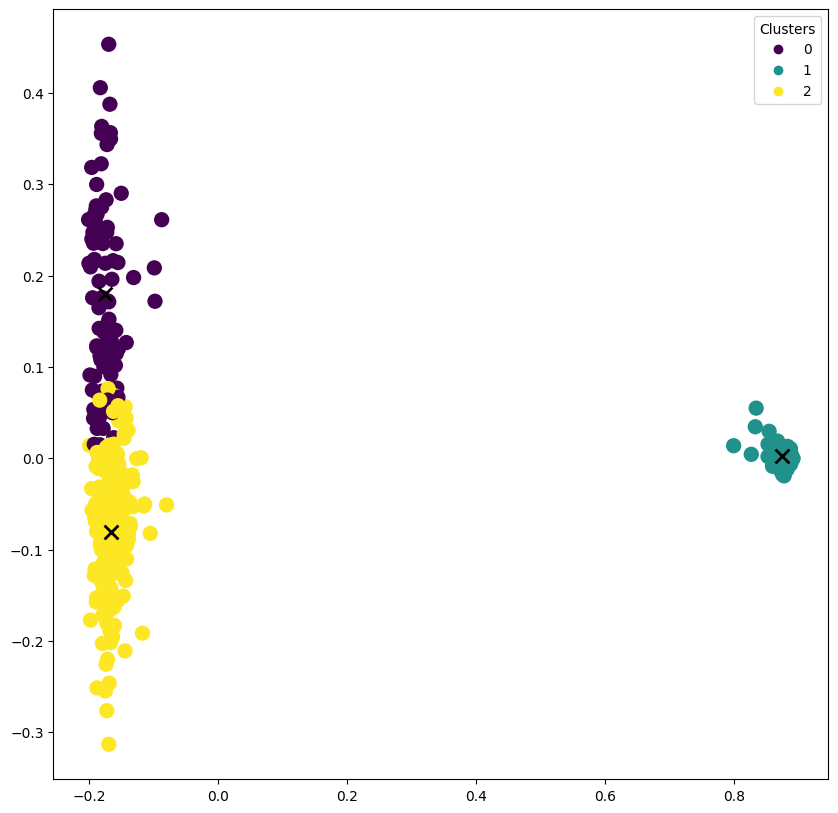

In [11]:
data_path = "../data/camille_vaccination/"
files = 'KB_JB421_1899-03-20_01-00002.txt','KB_JB421_1899-05-27_01-00003.txt','KB_JB421_1899-06-01_01-00003.txt','KB_JB421_1899-11-30_01-00002.txt','KB_JB421_1899-12-11_01-00002.txt','KB_JB555_1890-05-10_01-00001.txt','KB_JB555_1890-06-19_01-00002.txt','KB_JB555_1890-07-20_01-00002.txt','KB_JB555_1890-08-13_01-00002.txt','KB_JB555_1890-10-01_01-00002.txt','KB_JB555_1891-01-04_01-00002.txt','KB_JB555_1891-02-16_01-00001.txt','KB_JB555_1891-03-19_01-00001.txt','KB_JB555_1891-03-19_01-00002.txt','KB_JB555_1892-02-05_01-00002.txt','KB_JB555_1892-03-26_01-00002.txt','KB_JB555_1892-07-18_01-00002.txt','KB_JB555_1892-07-22_01-00002.txt','KB_JB555_1892-07-30_01-00002.txt','KB_JB555_1892-09-15_01-00001.txt','KB_JB555_1892-09-19_01-00003.txt','KB_JB555_1893-03-19_01-00005.txt','KB_JB555_1893-04-16_01-00006.txt','KB_JB555_1893-05-17_01-00002.txt','KB_JB555_1893-07-05_01-00001.txt','KB_JB555_1893-07-21_01-00001.txt','KB_JB555_1893-07-23_01-00001.txt','KB_JB555_1893-09-02_01-00001.txt','KB_JB555_1894-01-29_01-00003.txt','KB_JB555_1894-02-22_01-00001.txt','KB_JB555_1894-03-26_01-00002.txt','KB_JB555_1894-05-26_01-00001.txt','KB_JB555_1894-06-09_01-00002.txt','KB_JB555_1894-10-06_01-00001.txt','KB_JB555_1894-10-25_01-00002.txt','KB_JB555_1894-11-17_01-00001.txt','KB_JB555_1894-11-28_01-00001.txt','KB_JB555_1895-02-05_01-00001.txt','KB_JB555_1895-02-20_01-00001.txt','KB_JB555_1895-04-14_01-00001.txt','KB_JB555_1895-04-21_01-00001.txt','KB_JB555_1895-04-21_01-00006.txt','KB_JB555_1895-08-31_01-00002.txt','KB_JB555_1895-09-29_01-00001.txt','KB_JB555_1895-12-26_01-00002.txt','KB_JB555_1896-02-02_01-00001.txt','KB_JB555_1896-02-18_01-00002.txt','KB_JB555_1896-04-06_01-00002.txt','KB_JB555_1896-06-28_01-00006.txt','KB_JB555_1896-08-05_01-00001.txt','KB_JB555_1896-11-09_01-00001.txt','KB_JB555_1897-01-17_01-00005.txt','KB_JB555_1897-01-29_01-00001.txt','KB_JB555_1897-01-31_01-00002.txt','KB_JB555_1897-06-12_01-00002.txt','KB_JB555_1897-06-15_01-00002.txt','KB_JB555_1897-07-28_01-00003.txt','KB_JB555_1897-09-19_01-00001.txt','KB_JB555_1897-12-20_01-00003.txt','KB_JB555_1898-02-28_01-00003.txt','KB_JB555_1898-03-11_01-00001.txt','KB_JB555_1898-03-21_01-00003.txt','KB_JB555_1898-07-07_01-00003.txt','KB_JB555_1898-07-28_01-00001.txt','KB_JB555_1898-08-07_01-00001.txt','KB_JB555_1898-08-14_01-00005.txt','KB_JB555_1898-09-09_01-00001.txt','KB_JB555_1898-12-22_01-00002.txt','KB_JB555_1899-01-13_01-00002.txt','KB_JB555_1899-01-23_01-00003.txt','KB_JB555_1899-02-02_01-00003.txt','KB_JB555_1899-04-29_01-00001.txt','KB_JB555_1899-06-07_01-00001.txt','KB_JB555_1899-06-07_01-00002.txt','KB_JB555_1899-09-09_01-00002.txt','KB_JB555_1899-09-17_01-00006.txt','KB_JB555_1899-09-28_01-00001.txt','KB_JB567_1890-05-08_01-00002.txt','KB_JB567_1890-11-14_01-00002.txt','KB_JB567_1890-11-26_01-00002.txt','KB_JB567_1891-08-05_01-00002.txt','KB_JB567_1891-08-14_01-00001.txt','KB_JB567_1891-10-16_01-00001.txt','KB_JB567_1892-05-03_01-00002.txt','KB_JB567_1892-06-25_01-00002.txt','KB_JB567_1892-07-17_01-00005.txt','KB_JB567_1892-07-19_01-00002.txt','KB_JB567_1892-07-22_01-00002.txt','KB_JB567_1892-07-28_01-00002.txt','KB_JB567_1892-08-28_01-00001.txt','KB_JB567_1892-09-10_01-00001.txt','KB_JB567_1892-09-11_01-00001.txt','KB_JB567_1892-09-12_01-00001.txt','KB_JB567_1892-09-16_01-00001.txt','KB_JB567_1892-09-25_01-00001.txt','KB_JB567_1892-09-30_01-00001.txt','KB_JB567_1892-10-25_01-00002.txt','KB_JB567_1892-12-03_01-00001.txt','KB_JB567_1892-12-30_01-00002.txt','KB_JB567_1893-01-10_01-00002.txt','KB_JB567_1893-02-11_01-00001.txt','KB_JB567_1893-04-09_01-00001.txt','KB_JB567_1893-12-28_01-00001.txt','KB_JB567_1894-01-31_01-00002.txt','KB_JB567_1894-11-08_01-00001.txt','KB_JB567_1895-02-20_01-00002.txt','KB_JB567_1895-03-03_01-00002.txt','KB_JB567_1895-04-08_01-00002.txt','KB_JB567_1895-04-12_01-00002.txt','KB_JB567_1895-05-06_01-00002.txt','KB_JB567_1895-06-11_01-00002.txt','KB_JB567_1895-08-09_01-00002.txt','KB_JB567_1895-08-25_01-00001.txt','KB_JB567_1895-09-30_01-00001.txt','KB_JB567_1896-02-21_01-00001.txt','KB_JB567_1896-08-16_01-00002.txt','KB_JB567_1896-09-05_01-00002.txt','KB_JB567_1897-01-30_01-00002.txt','KB_JB567_1897-05-31_01-00001.txt','KB_JB567_1897-07-28_01-00002.txt','KB_JB567_1897-09-21_01-00002.txt','KB_JB567_1897-10-14_01-00002.txt','KB_JB567_1897-12-05_01-00006.txt','KB_JB567_1898-08-14_01-00001.txt','KB_JB567_1898-08-18_01-00002.txt','KB_JB567_1898-10-27_01-00001.txt','KB_JB567_1898-11-29_01-00001.txt','KB_JB567_1898-12-14_01-00002.txt','KB_JB567_1898-12-18_01-00001.txt','KB_JB567_1899-01-17_01-00001.txt','KB_JB567_1899-01-18_01-00001.txt','KB_JB567_1899-10-11_01-00002.txt','KB_JB567_1899-10-19_01-00001.txt','KB_JB572_1896-02-07_01-00002.txt','KB_JB572_1896-03-16_01-00002.txt','KB_JB572_1896-04-08_01-00002.txt','KB_JB572_1896-04-12_01-00002.txt','KB_JB572_1896-10-15_01-00002.txt','KB_JB572_1897-04-13_01-00003.txt','KB_JB572_1897-05-23_02-00010.txt','KB_JB572_1897-07-14_01-00002.txt','KB_JB572_1897-10-21_01-00001.txt','KB_JB572_1898-02-21_01-00001.txt','KB_JB572_1898-05-12_01-00002.txt','KB_JB572_1898-08-08_01-00001.txt','KB_JB572_1898-08-11_01-00001.txt','KB_JB572_1898-09-03_01-00003.txt','KB_JB572_1898-09-06_01-00001.txt','KB_JB572_1898-09-09_01-00003.txt','KB_JB572_1899-01-11_01-00003.txt','KB_JB572_1899-04-05_01-00002.txt','KB_JB572_1899-05-17_01-00002.txt','KB_JB572_1899-07-25_01-00001.txt','KB_JB572_1899-10-13_01-00001.txt','KB_JB638_1890-05-08_01-00001.txt','KB_JB638_1890-05-12_01-00002.txt','KB_JB638_1890-06-10_01-00002.txt','KB_JB638_1890-07-23_01-00002.txt','KB_JB638_1890-11-17_01-00002.txt','KB_JB638_1890-12-11_01-00001.txt','KB_JB638_1890-12-13_01-00005.txt','KB_JB638_1891-01-21_01-00003.txt','KB_JB638_1891-01-29_01-00005.txt','KB_JB638_1891-03-28_01-00006.txt','KB_JB638_1891-04-18_01-00005.txt','KB_JB638_1891-05-02_01-00009.txt','KB_JB638_1891-08-03_01-00002.txt','KB_JB638_1892-02-23_01-00002.txt','KB_JB638_1892-04-01_01-00002.txt','KB_JB638_1892-04-12_01-00001.txt','KB_JB638_1892-04-19_01-00003.txt','KB_JB638_1892-05-02_01-00002.txt','KB_JB638_1892-05-11_01-00002.txt','KB_JB638_1892-06-10_01-00002.txt','KB_JB638_1892-06-15_01-00003.txt','KB_JB638_1892-07-16_01-00001.txt','KB_JB638_1892-07-16_01-00005.txt','KB_JB638_1892-07-30_01-00002.txt','KB_JB638_1892-07-30_01-00006.txt','KB_JB638_1892-08-13_01-00001.txt','KB_JB638_1892-08-13_01-00005.txt','KB_JB638_1892-08-17_01-00001.txt','KB_JB638_1892-09-10_01-00002.txt','KB_JB638_1892-09-14_01-00002.txt','KB_JB638_1892-09-23_01-00002.txt','KB_JB638_1892-10-29_01-00005.txt','KB_JB638_1892-11-12_01-00005.txt','KB_JB638_1892-12-01_01-00006.txt','KB_JB638_1892-12-12_01-00002.txt','KB_JB638_1892-12-17_01-00002.txt','KB_JB638_1892-12-20_01-00002.txt','KB_JB638_1892-12-29_01-00006.txt','KB_JB638_1893-03-20_01-00002.txt','KB_JB638_1893-04-08_01-00001.txt','KB_JB638_1893-04-08_01-00005.txt','KB_JB638_1893-04-22_01-00010.txt','KB_JB638_1893-05-20_01-00005.txt','KB_JB638_1893-07-07_01-00002.txt','KB_JB638_1893-07-08_01-00002.txt','KB_JB638_1893-07-17_01-00002.txt','KB_JB638_1893-07-19_01-00002.txt','KB_JB638_1893-07-21_01-00001.txt','KB_JB638_1893-07-21_01-00002.txt','KB_JB638_1893-07-29_01-00006.txt','KB_JB638_1893-08-10_01-00003.txt','KB_JB638_1894-02-01_01-00007.txt','KB_JB638_1894-02-15_01-00007.txt','KB_JB638_1894-03-15_01-00002.txt','KB_JB638_1894-06-12_01-00003.txt','KB_JB638_1894-06-14_01-00005.txt','KB_JB638_1894-09-01_01-00002.txt','KB_JB638_1894-10-24_01-00001.txt','KB_JB638_1894-10-31_01-00007.txt','KB_JB638_1894-11-28_01-00003.txt','KB_JB638_1895-02-20_01-00002.txt','KB_JB638_1895-04-08_01-00001.txt','KB_JB638_1896-01-21_01-00002.txt','KB_JB638_1896-03-21_01-00005.txt','KB_JB638_1896-06-17_01-00003.txt','KB_JB638_1896-08-29_01-00002.txt','KB_JB638_1896-10-28_01-00002.txt','KB_JB638_1897-01-13_01-00002.txt','KB_JB638_1897-01-30_01-00006.txt','KB_JB638_1897-02-06_01-00005.txt','KB_JB638_1897-09-10_01-00002.txt','KB_JB638_1897-09-15_01-00002.txt','KB_JB638_1897-10-01_01-00002.txt','KB_JB638_1898-04-14_01-00002.txt','KB_JB638_1898-04-29_01-00002.txt','KB_JB638_1898-05-13_01-00002.txt','KB_JB638_1898-05-23_01-00002.txt','KB_JB638_1898-05-26_01-00002.txt','KB_JB638_1898-06-06_01-00002.txt','KB_JB638_1898-07-29_01-00001.txt','KB_JB638_1898-09-09_01-00002.txt','KB_JB638_1898-09-10_01-00002.txt','KB_JB638_1898-09-16_01-00002.txt','KB_JB638_1898-09-19_01-00002.txt','KB_JB638_1898-09-21_01-00002.txt','KB_JB638_1898-09-22_01-00002.txt','KB_JB638_1898-10-07_01-00002.txt','KB_JB638_1899-01-07_01-00005.txt','KB_JB638_1899-01-13_01-00002.txt','KB_JB638_1899-04-15_01-00002.txt','KB_JB638_1899-05-08_01-00003.txt','KB_JB638_1899-06-07_01-00002.txt','KB_JB638_1899-08-02_01-00001.txt','KB_JB638_1899-09-02_01-00002.txt','KB_JB638_1899-09-09_02-00004.txt','KB_JB638_1899-09-29_01-00002.txt','KB_JB638_1899-11-25_01-00009.txt','KB_JB685_1894-05-25_01-0002.txt','KB_JB685_1894-11-09_01-0002.txt','KB_JB685_1894-11-17_01-0002.txt','KB_JB685_1895-03-28_01-0002.txt','KB_JB685_1895-04-14_01-0001.txt','KB_JB685_1895-04-21_01-0002.txt','KB_JB685_1895-08-27_01-0003.txt','KB_JB685_1895-08-31_01-0002.txt','KB_JB685_1896-02-02_01-0001.txt','KB_JB685_1896-04-02_01-0001.txt','KB_JB685_1896-05-13_01-0001.txt','KB_JB685_1896-05-14_01-0001.txt','KB_JB685_1896-08-05_01-0002.txt','KB_JB685_1896-12-15_01-0001.txt','KB_JB685_1897-09-18_01-0001.txt','KB_JB685_1898-07-09_01-0001.txt','KB_JB685_1898-08-06_01-0002.txt','KB_JB685_1898-09-02_01-0001.txt','KB_JB685_1898-09-20_01-0003.txt','KB_JB685_1899-01-04_01-0003.txt','KB_JB685_1899-03-19_01-0005.txt','KB_JB685_1899-09-09_01-0001.txt','KB_JB685_1899-10-10_01-0002.txt','KB_JB685_1899-12-06_01-0001.txt','KB_JB685_1899-12-11_01-0001.txt','KB_JB729_1895-07-11_01-00002.txt','KB_JB729_1895-08-23_01-00001.txt','KB_JB729_1896-02-04_01-00001.txt','KB_JB729_1896-09-22_01-00001.txt','KB_JB729_1896-10-25_01-00006.txt','KB_JB729_1897-01-01_01-00001.txt','KB_JB729_1897-04-13_01-00001.txt','KB_JB729_1897-06-13_01-00001.txt','KB_JB729_1897-12-15_01-00001.txt','KB_JB729_1898-04-04_01-00001.txt','KB_JB729_1898-07-24_01-00002.txt','KB_JB729_1898-08-07_01-00002.txt','KB_JB729_1898-12-30_01-00001.txt','KB_JB729_1899-01-18_01-00001.txt','KB_JB729_1899-02-05_01-00002.txt','KB_JB729_1899-06-24_01-00001.txt','KB_JB729_1899-09-09_01-00002.txt','KB_JB729_1899-09-10_01-00002.txt','KB_JB729_1899-11-14_01-00002.txt','KB_JB837_1891-01-26_01-00002.txt','KB_JB837_1892-02-06_01-00002.txt','KB_JB837_1892-03-10_01-00003.txt','KB_JB837_1892-03-28_01-00003.txt','KB_JB837_1892-06-24_01-00002.txt','KB_JB837_1892-10-10_01-00003.txt','KB_JB837_1893-03-13_01-00002.txt','KB_JB837_1894-02-26_01-00001.txt','KB_JB837_1894-10-24_01-00002.txt','KB_JB837_1894-10-26_01-00001.txt','KB_JB837_1894-10-27_01-00002.txt','KB_JB837_1895-02-20_01-00002.txt','KB_JB837_1896-04-06_01-00003.txt','KB_JB837_1896-06-08_01-00003.txt','KB_JB837_1896-08-21_01-00002.txt','KB_JB837_1896-09-16_01-00001.txt','KB_JB837_1896-12-06_01-00006.txt','KB_JB837_1897-05-09_02-00002.txt','KB_JB837_1897-07-18_01-00005.txt','KB_JB837_1897-10-02_01-00002.txt','KB_JB837_1897-10-03_01-00002.txt','KB_JB837_1897-11-17_01-00001.txt','KB_JB837_1897-12-27_01-00003.txt','KB_JB837_1898-03-08_01-00001.txt','KB_JB837_1898-04-11_01-00001.txt','KB_JB837_1898-08-02_01-00002.txt','KB_JB837_1898-08-04_01-00002.txt','KB_JB837_1898-08-06_01-00002.txt','KB_JB837_1898-08-07_01-00002.txt','KB_JB837_1898-09-15_01-00002.txt','KB_JB837_1898-09-19_01-00002.txt','KB_JB837_1898-10-08_01-00002.txt','KB_JB837_1899-04-16_01-00002.txt','KB_JB837_1899-09-04_01-00003.txt','KB_JB837_1899-09-11_01-00003.txt','KB_JB837_1899-10-11_01-00002.txt','KB_JB838_1890-06-16_01-00003.txt','KB_JB838_1890-10-31_01-00001.txt','KB_JB838_1890-11-21_01-00001.txt','KB_JB838_1890-11-24_01-00002.txt','KB_JB838_1891-02-24_01-00002.txt','KB_JB838_1891-07-18_01-00001.txt','KB_JB838_1892-02-24_01-00002.txt','KB_JB838_1892-02-25_01-00003.txt','KB_JB838_1892-10-01_01-00002.txt','KB_JB838_1892-12-08_01-00006.txt','KB_JB838_1893-05-18_01-00005.txt','KB_JB838_1893-10-30_01-00001.txt','KB_JB838_1894-02-14_01-00005.txt','KB_JB838_1894-09-13_01-00005.txt','KB_JB838_1894-10-25_01-00005.txt','KB_JB838_1895-02-16_01-00002.txt','KB_JB838_1895-03-25_01-00001.txt','KB_JB838_1895-08-15_01-00001.txt','KB_JB838_1895-10-29_01-00002.txt','KB_JB838_1896-02-10_01-00003.txt','KB_JB838_1896-05-27_01-00006.txt','KB_JB838_1896-07-23_01-00006.txt','KB_JB838_1896-07-29_01-00006.txt','KB_JB838_1896-12-13_01-00001.txt','KB_JB838_1897-02-11_01-00007.txt','KB_JB838_1897-04-12_01-00003.txt','KB_JB838_1897-09-15_01-00005.txt','KB_JB838_1897-09-15_01-00006.txt','KB_JB838_1897-10-01_01-00006.txt','KB_JB838_1898-02-26_01-00002.txt','KB_JB838_1898-03-10_01-00001.txt','KB_JB838_1898-08-07_01-00001.txt','KB_JB838_1898-08-24_01-00002.txt','KB_JB838_1898-09-02_01-00001.txt'

texts = [open(data_path + f,encoding='utf-8').read() for f in files]

# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)
    

#Construire la matrice de vecteurs à l'aide de la fonction fit transform

tfidf_vectors = vectorizer.fit_transform(texts)

tfidf_array = tfidf_vectors.toarray()

#Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents
#Définir un nombre de clusters
N_CLUSTERS = 3

#Instancier le modèle KMeans et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

#Appliquer le clustering à l'aide de la fonction fit_predict
clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

#Visualiser les clusters

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")



Analyse des clusters composant le cluster 1


In [12]:
#Keywords du Cluster 0 (du premier cluster 1)
data_path = "../data/camille_vaccination/"
files ='KB_JB555_1892-07-18_01-00002.txt','KB_JB555_1895-12-26_01-00002.txt','KB_JB555_1897-07-28_01-00003.txt','KB_JB555_1898-07-07_01-00003.txt','KB_JB567_1890-11-14_01-00002.txt','KB_JB567_1892-05-03_01-00002.txt','KB_JB567_1892-06-25_01-00002.txt','KB_JB567_1892-07-22_01-00002.txt','KB_JB567_1892-09-10_01-00001.txt','KB_JB567_1892-09-11_01-00001.txt','KB_JB567_1892-10-25_01-00002.txt','KB_JB567_1892-12-30_01-00002.txt','KB_JB567_1895-04-08_01-00002.txt','KB_JB567_1895-06-11_01-00002.txt','KB_JB567_1895-08-09_01-00002.txt','KB_JB567_1896-09-05_01-00002.txt','KB_JB572_1896-04-08_01-00002.txt','KB_JB572_1897-07-14_01-00002.txt','KB_JB638_1890-05-12_01-00002.txt','KB_JB638_1890-06-10_01-00002.txt','KB_JB638_1890-07-23_01-00002.txt','KB_JB638_1890-11-17_01-00002.txt','KB_JB638_1890-12-13_01-00005.txt','KB_JB638_1891-01-21_01-00003.txt','KB_JB638_1891-01-29_01-00005.txt','KB_JB638_1891-03-28_01-00006.txt','KB_JB638_1891-08-03_01-00002.txt','KB_JB638_1892-04-01_01-00002.txt','KB_JB638_1892-04-19_01-00003.txt','KB_JB638_1892-05-02_01-00002.txt','KB_JB638_1892-05-11_01-00002.txt','KB_JB638_1892-06-10_01-00002.txt','KB_JB638_1892-06-15_01-00003.txt','KB_JB638_1892-07-16_01-00005.txt','KB_JB638_1892-07-30_01-00002.txt','KB_JB638_1892-07-30_01-00006.txt','KB_JB638_1892-09-10_01-00002.txt','KB_JB638_1892-09-14_01-00002.txt','KB_JB638_1892-09-23_01-00002.txt','KB_JB638_1892-12-01_01-00006.txt','KB_JB638_1892-12-12_01-00002.txt','KB_JB638_1892-12-17_01-00002.txt','KB_JB638_1892-12-20_01-00002.txt','KB_JB638_1892-12-29_01-00006.txt','KB_JB638_1893-03-20_01-00002.txt','KB_JB638_1893-04-22_01-00010.txt','KB_JB638_1893-07-07_01-00002.txt','KB_JB638_1893-07-08_01-00002.txt','KB_JB638_1893-07-17_01-00002.txt','KB_JB638_1893-07-19_01-00002.txt','KB_JB638_1893-07-21_01-00002.txt','KB_JB638_1893-07-29_01-00006.txt','KB_JB638_1893-08-10_01-00003.txt','KB_JB638_1894-02-01_01-00007.txt','KB_JB638_1894-02-15_01-00007.txt','KB_JB638_1894-03-15_01-00002.txt','KB_JB638_1894-06-12_01-00003.txt','KB_JB638_1894-09-01_01-00002.txt','KB_JB638_1894-10-31_01-00007.txt','KB_JB638_1894-11-28_01-00003.txt','KB_JB638_1895-02-20_01-00002.txt','KB_JB638_1896-01-21_01-00002.txt','KB_JB638_1896-06-17_01-00003.txt','KB_JB638_1896-08-29_01-00002.txt','KB_JB638_1896-10-28_01-00002.txt','KB_JB638_1897-01-13_01-00002.txt','KB_JB638_1897-01-30_01-00006.txt','KB_JB638_1897-09-10_01-00002.txt','KB_JB638_1897-09-15_01-00002.txt','KB_JB638_1897-10-01_01-00002.txt','KB_JB638_1898-04-14_01-00002.txt','KB_JB638_1898-04-29_01-00002.txt','KB_JB638_1898-05-13_01-00002.txt','KB_JB638_1898-05-23_01-00002.txt','KB_JB638_1898-05-26_01-00002.txt','KB_JB638_1898-06-06_01-00002.txt','KB_JB638_1898-09-09_01-00002.txt','KB_JB638_1898-09-10_01-00002.txt','KB_JB638_1898-09-16_01-00002.txt','KB_JB638_1898-09-19_01-00002.txt','KB_JB638_1898-09-21_01-00002.txt','KB_JB638_1898-09-22_01-00002.txt','KB_JB638_1898-10-07_01-00002.txt','KB_JB638_1899-01-13_01-00002.txt','KB_JB638_1899-04-15_01-00002.txt','KB_JB638_1899-05-08_01-00003.txt','KB_JB638_1899-06-07_01-00002.txt','KB_JB638_1899-09-02_01-00002.txt','KB_JB638_1899-09-09_02-00004.txt','KB_JB638_1899-09-29_01-00002.txt'

for f in sorted(files)[0:216]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 1:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB555_1892-07-18_01-00002.txt mentions these keywords: concours, heures, Sociétés, commission, Nautique, d'un, Ueu, d'une, temps, Sport, BruxeUes, Société, c'est, l'union, Gand, course, province, L'ASSOCIATION, Van, vœu, Paris, matin, directeur, place, part, s'est, gouvernement, Garde, Liège, PIGEONS, grand, Buis, avez, Royal, général, chasseurs...
KB_JB555_1895-12-26_01-00002.txt mentions these keywords: classe, Capitaine, second, Capitaines, Paris, d'une, Arrondissement, Van, qu'il, lieutenant, conseil, Chambre, Lebaudy, d'un, c'est, France, ministre, décembre, faire, Noël, jour, jours, commandant, gouvernement, bataillon, major, grande, mort, l'on, Médecins, Province, séance, heures, Grand, SÉNAT, partie...
KB_JB555_1897-07-28_01-00003.txt mentions these keywords: Chambre, commission, prix, Paris, heures, Londres, Rhodes, d'un, Transvaal, fut, gouvernement, ministre, rapport, Strauss, série, Pari, Van, Marché, août, Conseil, d'une, lieutenant, qu'il, Paul, nom, Chamberlain, dit, 

In [13]:
#Keywords du Cluster 1 (du premier cluster 1)
data_path = "../data/camille_vaccination/"
files = 'KB_JB685_1894-05-25_01-0002.txt','KB_JB685_1894-11-09_01-0002.txt','KB_JB685_1894-11-17_01-0002.txt','KB_JB685_1895-03-28_01-0002.txt','KB_JB685_1895-04-14_01-0001.txt','KB_JB685_1895-04-21_01-0002.txt','KB_JB685_1895-08-27_01-0003.txt','KB_JB685_1895-08-31_01-0002.txt','KB_JB685_1896-02-02_01-0001.txt','KB_JB685_1896-04-02_01-0001.txt','KB_JB685_1896-05-13_01-0001.txt','KB_JB685_1896-05-14_01-0001.txt','KB_JB685_1896-08-05_01-0002.txt','KB_JB685_1896-12-15_01-0001.txt','KB_JB685_1897-09-18_01-0001.txt','KB_JB685_1898-07-09_01-0001.txt','KB_JB685_1898-08-06_01-0002.txt','KB_JB685_1898-09-02_01-0001.txt','KB_JB685_1898-09-20_01-0003.txt','KB_JB685_1899-01-04_01-0003.txt','KB_JB685_1899-03-19_01-0005.txt','KB_JB685_1899-09-09_01-0001.txt','KB_JB685_1899-10-10_01-0002.txt','KB_JB685_1899-12-06_01-0001.txt','KB_JB685_1899-12-11_01-0001.txt','KB_JB838_1890-06-16_01-00003.txt','KB_JB838_1890-10-31_01-00001.txt','KB_JB838_1890-11-21_01-00001.txt','KB_JB838_1890-11-24_01-00002.txt','KB_JB838_1891-02-24_01-00002.txt','KB_JB838_1891-07-18_01-00001.txt','KB_JB838_1892-02-24_01-00002.txt','KB_JB838_1892-02-25_01-00003.txt','KB_JB838_1892-10-01_01-00002.txt','KB_JB838_1892-12-08_01-00006.txt','KB_JB838_1893-05-18_01-00005.txt','KB_JB838_1893-10-30_01-00001.txt','KB_JB838_1894-02-14_01-00005.txt','KB_JB838_1894-09-13_01-00005.txt','KB_JB838_1894-10-25_01-00005.txt','KB_JB838_1895-02-16_01-00002.txt','KB_JB838_1895-03-25_01-00001.txt','KB_JB838_1895-08-15_01-00001.txt','KB_JB838_1895-10-29_01-00002.txt','KB_JB838_1896-02-10_01-00003.txt','KB_JB838_1896-05-27_01-00006.txt','KB_JB838_1896-07-23_01-00006.txt','KB_JB838_1896-07-29_01-00006.txt','KB_JB838_1896-12-13_01-00001.txt','KB_JB838_1897-02-11_01-00007.txt','KB_JB838_1897-04-12_01-00003.txt','KB_JB838_1897-09-15_01-00005.txt','KB_JB838_1897-09-15_01-00006.txt','KB_JB838_1897-10-01_01-00006.txt','KB_JB838_1898-02-26_01-00002.txt','KB_JB838_1898-03-10_01-00001.txt','KB_JB838_1898-08-07_01-00001.txt','KB_JB838_1898-08-24_01-00002.txt','KB_JB838_1898-09-02_01-00001.txt'

for f in sorted(files)[0:216]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 1:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB685_1894-05-25_01-0002.txt mentions these keywords: Cour, lee, fut, Stappers, amazones, nombre, grand, journaux, LIÈGE, roi, Dût, jour, Gladstone, voir, Paris, Jeannette, petit, nouveau, ans, père, Ion, lut, russe, lettre, aurait, n’a, qu’il, cocher, corps, d'une, général, venait...
KB_JB685_1894-11-09_01-0002.txt mentions these keywords: plus, ans, Mais, mort, francs, lee, jeune, nouvelle, lea, Compagnie, C’est, plu, Belgique, dee, peintre, chemin, mai, travaux, homme, ingénieur, d’un, ment, noue, provincial, grand, l’on, faire, met, Bleu, enterrement, Yvette, gouvernement, scs, jours, petit, théâtre, général...
KB_JB685_1894-11-17_01-0002.txt mentions these keywords: Congo, MARSY, petit, dit, chose, Chambre, dee, Bleu, major, n’a, LOUISE, voix, Bitrua, l’on, C’est, vient, propos, discussion, Puis, Lee, temps, francs, voir, qu'il, idées, maison, température, proposition, HALF, d’un, porte, kilo, droite, tour, droit, vau, eet, ensuite, général...
KB_JB685_1895-03-28_01-0002.txt me

In [14]:
#Keywords du Cluster 2 (du premier cluster 1)
data_path = "../data/camille_vaccination/"
files = 'KB_JB421_1899-03-20_01-00002.txt','KB_JB421_1899-05-27_01-00003.txt','KB_JB421_1899-06-01_01-00003.txt','KB_JB421_1899-11-30_01-00002.txt','KB_JB421_1899-12-11_01-00002.txt','KB_JB555_1890-05-10_01-00001.txt','KB_JB555_1890-06-19_01-00002.txt','KB_JB555_1890-07-20_01-00002.txt','KB_JB555_1890-08-13_01-00002.txt','KB_JB555_1890-10-01_01-00002.txt','KB_JB555_1891-01-04_01-00002.txt','KB_JB555_1891-02-16_01-00001.txt','KB_JB555_1891-03-19_01-00001.txt','KB_JB555_1891-03-19_01-00002.txt','KB_JB555_1892-02-05_01-00002.txt','KB_JB555_1892-03-26_01-00002.txt','KB_JB555_1892-07-22_01-00002.txt','KB_JB555_1892-07-30_01-00002.txt','KB_JB555_1892-09-15_01-00001.txt','KB_JB555_1892-09-19_01-00003.txt','KB_JB555_1893-03-19_01-00005.txt','KB_JB555_1893-04-16_01-00006.txt','KB_JB555_1893-05-17_01-00002.txt','KB_JB555_1893-07-05_01-00001.txt','KB_JB555_1893-07-21_01-00001.txt','KB_JB555_1893-07-23_01-00001.txt','KB_JB555_1893-09-02_01-00001.txt','KB_JB555_1894-01-29_01-00003.txt','KB_JB555_1894-02-22_01-00001.txt','KB_JB555_1894-03-26_01-00002.txt','KB_JB555_1894-05-26_01-00001.txt','KB_JB555_1894-06-09_01-00002.txt','KB_JB555_1894-10-06_01-00001.txt','KB_JB555_1894-10-25_01-00002.txt','KB_JB555_1894-11-17_01-00001.txt','KB_JB555_1894-11-28_01-00001.txt','KB_JB555_1895-02-05_01-00001.txt','KB_JB555_1895-02-20_01-00001.txt','KB_JB555_1895-04-14_01-00001.txt','KB_JB555_1895-04-21_01-00001.txt','KB_JB555_1895-04-21_01-00006.txt','KB_JB555_1895-08-31_01-00002.txt','KB_JB555_1895-09-29_01-00001.txt','KB_JB555_1896-02-02_01-00001.txt','KB_JB555_1896-02-18_01-00002.txt','KB_JB555_1896-04-06_01-00002.txt','KB_JB555_1896-06-28_01-00006.txt','KB_JB555_1896-08-05_01-00001.txt','KB_JB555_1896-11-09_01-00001.txt','KB_JB555_1897-01-17_01-00005.txt','KB_JB555_1897-01-29_01-00001.txt','KB_JB555_1897-01-31_01-00002.txt','KB_JB555_1897-06-12_01-00002.txt','KB_JB555_1897-06-15_01-00002.txt','KB_JB555_1897-09-19_01-00001.txt','KB_JB555_1897-12-20_01-00003.txt','KB_JB555_1898-02-28_01-00003.txt','KB_JB555_1898-03-11_01-00001.txt','KB_JB555_1898-03-21_01-00003.txt','KB_JB555_1898-07-28_01-00001.txt','KB_JB555_1898-08-07_01-00001.txt','KB_JB555_1898-08-14_01-00005.txt','KB_JB555_1898-09-09_01-00001.txt','KB_JB555_1898-12-22_01-00002.txt','KB_JB555_1899-01-13_01-00002.txt','KB_JB555_1899-01-23_01-00003.txt','KB_JB555_1899-02-02_01-00003.txt','KB_JB555_1899-04-29_01-00001.txt','KB_JB555_1899-06-07_01-00001.txt','KB_JB555_1899-06-07_01-00002.txt','KB_JB555_1899-09-09_01-00002.txt','KB_JB555_1899-09-17_01-00006.txt','KB_JB555_1899-09-28_01-00001.txt','KB_JB567_1890-05-08_01-00002.txt','KB_JB567_1890-11-26_01-00002.txt','KB_JB567_1891-08-05_01-00002.txt','KB_JB567_1891-08-14_01-00001.txt','KB_JB567_1891-10-16_01-00001.txt','KB_JB567_1892-07-17_01-00005.txt','KB_JB567_1892-07-19_01-00002.txt','KB_JB567_1892-07-28_01-00002.txt','KB_JB567_1892-08-28_01-00001.txt','KB_JB567_1892-09-12_01-00001.txt','KB_JB567_1892-09-16_01-00001.txt','KB_JB567_1892-09-25_01-00001.txt','KB_JB567_1892-09-30_01-00001.txt','KB_JB567_1892-12-03_01-00001.txt','KB_JB567_1893-01-10_01-00002.txt','KB_JB567_1893-02-11_01-00001.txt','KB_JB567_1893-04-09_01-00001.txt','KB_JB567_1893-12-28_01-00001.txt','KB_JB567_1894-01-31_01-00002.txt','KB_JB567_1894-11-08_01-00001.txt','KB_JB567_1895-02-20_01-00002.txt','KB_JB567_1895-03-03_01-00002.txt','KB_JB567_1895-04-12_01-00002.txt','KB_JB567_1895-05-06_01-00002.txt','KB_JB567_1895-08-25_01-00001.txt','KB_JB567_1895-09-30_01-00001.txt','KB_JB567_1896-02-21_01-00001.txt','KB_JB567_1896-08-16_01-00002.txt','KB_JB567_1897-01-30_01-00002.txt','KB_JB567_1897-05-31_01-00001.txt','KB_JB567_1897-07-28_01-00002.txt','KB_JB567_1897-09-21_01-00002.txt','KB_JB567_1897-10-14_01-00002.txt','KB_JB567_1897-12-05_01-00006.txt','KB_JB567_1898-08-14_01-00001.txt','KB_JB567_1898-08-18_01-00002.txt','KB_JB567_1898-10-27_01-00001.txt','KB_JB567_1898-11-29_01-00001.txt','KB_JB567_1898-12-14_01-00002.txt','KB_JB567_1898-12-18_01-00001.txt','KB_JB567_1899-01-17_01-00001.txt','KB_JB567_1899-01-18_01-00001.txt','KB_JB567_1899-10-11_01-00002.txt','KB_JB567_1899-10-19_01-00001.txt','KB_JB572_1896-02-07_01-00002.txt','KB_JB572_1896-03-16_01-00002.txt','KB_JB572_1896-04-12_01-00002.txt','KB_JB572_1896-10-15_01-00002.txt','KB_JB572_1897-04-13_01-00003.txt','KB_JB572_1897-05-23_02-00010.txt','KB_JB572_1897-10-21_01-00001.txt','KB_JB572_1898-02-21_01-00001.txt','KB_JB572_1898-05-12_01-00002.txt','KB_JB572_1898-08-08_01-00001.txt','KB_JB572_1898-08-11_01-00001.txt','KB_JB572_1898-09-03_01-00003.txt','KB_JB572_1898-09-06_01-00001.txt','KB_JB572_1898-09-09_01-00003.txt','KB_JB572_1899-01-11_01-00003.txt','KB_JB572_1899-04-05_01-00002.txt','KB_JB572_1899-05-17_01-00002.txt','KB_JB572_1899-07-25_01-00001.txt','KB_JB572_1899-10-13_01-00001.txt','KB_JB638_1890-05-08_01-00001.txt','KB_JB638_1890-12-11_01-00001.txt','KB_JB638_1891-04-18_01-00005.txt','KB_JB638_1891-05-02_01-00009.txt','KB_JB638_1892-02-23_01-00002.txt','KB_JB638_1892-04-12_01-00001.txt','KB_JB638_1892-07-16_01-00001.txt','KB_JB638_1892-08-13_01-00001.txt','KB_JB638_1892-08-13_01-00005.txt','KB_JB638_1892-08-17_01-00001.txt','KB_JB638_1892-10-29_01-00005.txt','KB_JB638_1892-11-12_01-00005.txt','KB_JB638_1893-04-08_01-00001.txt','KB_JB638_1893-04-08_01-00005.txt','KB_JB638_1893-05-20_01-00005.txt','KB_JB638_1893-07-21_01-00001.txt','KB_JB638_1894-06-14_01-00005.txt','KB_JB638_1894-10-24_01-00001.txt','KB_JB638_1895-04-08_01-00001.txt','KB_JB638_1896-03-21_01-00005.txt','KB_JB638_1897-02-06_01-00005.txt','KB_JB638_1898-07-29_01-00001.txt','KB_JB638_1899-01-07_01-00005.txt','KB_JB638_1899-08-02_01-00001.txt','KB_JB638_1899-11-25_01-00009.txt','KB_JB729_1895-07-11_01-00002.txt','KB_JB729_1895-08-23_01-00001.txt','KB_JB729_1896-02-04_01-00001.txt','KB_JB729_1896-09-22_01-00001.txt','KB_JB729_1896-10-25_01-00006.txt','KB_JB729_1897-01-01_01-00001.txt','KB_JB729_1897-04-13_01-00001.txt','KB_JB729_1897-06-13_01-00001.txt','KB_JB729_1897-12-15_01-00001.txt','KB_JB729_1898-04-04_01-00001.txt','KB_JB729_1898-07-24_01-00002.txt','KB_JB729_1898-08-07_01-00002.txt','KB_JB729_1898-12-30_01-00001.txt','KB_JB729_1899-01-18_01-00001.txt','KB_JB729_1899-02-05_01-00002.txt','KB_JB729_1899-06-24_01-00001.txt','KB_JB729_1899-09-09_01-00002.txt','KB_JB729_1899-09-10_01-00002.txt','KB_JB729_1899-11-14_01-00002.txt','KB_JB837_1891-01-26_01-00002.txt','KB_JB837_1892-02-06_01-00002.txt','KB_JB837_1892-03-10_01-00003.txt','KB_JB837_1892-03-28_01-00003.txt','KB_JB837_1892-06-24_01-00002.txt','KB_JB837_1892-10-10_01-00003.txt','KB_JB837_1893-03-13_01-00002.txt','KB_JB837_1894-02-26_01-00001.txt','KB_JB837_1894-10-24_01-00002.txt','KB_JB837_1894-10-26_01-00001.txt','KB_JB837_1894-10-27_01-00002.txt','KB_JB837_1895-02-20_01-00002.txt','KB_JB837_1896-04-06_01-00003.txt','KB_JB837_1896-06-08_01-00003.txt','KB_JB837_1896-08-21_01-00002.txt','KB_JB837_1896-09-16_01-00001.txt','KB_JB837_1896-12-06_01-00006.txt','KB_JB837_1897-05-09_02-00002.txt','KB_JB837_1897-07-18_01-00005.txt','KB_JB837_1897-10-02_01-00002.txt','KB_JB837_1897-10-03_01-00002.txt','KB_JB837_1897-11-17_01-00001.txt','KB_JB837_1897-12-27_01-00003.txt','KB_JB837_1898-03-08_01-00001.txt','KB_JB837_1898-04-11_01-00001.txt','KB_JB837_1898-08-02_01-00002.txt','KB_JB837_1898-08-04_01-00002.txt','KB_JB837_1898-08-06_01-00002.txt','KB_JB837_1898-08-07_01-00002.txt','KB_JB837_1898-09-15_01-00002.txt','KB_JB837_1898-09-19_01-00002.txt','KB_JB837_1898-10-08_01-00002.txt','KB_JB837_1899-04-16_01-00002.txt','KB_JB837_1899-09-04_01-00003.txt','KB_JB837_1899-09-11_01-00003.txt','KB_JB837_1899-10-11_01-00002.txt'

for f in sorted(files)[0:216]:
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 1:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB421_1899-03-20_01-00002.txt mentions these keywords: qu'il, jamais, ligne, Foveaux, d'un, août, sérum, parents, crime, lettre, Dieu, septembre, division, d'une, Gaston, Flamidien, Qu'on, part, enfant, point, moment, Castiaux, victime, bon, élèves, élève, famille, Monnaie, mort, Croix, l'enfant, fut, l'autopsie, temps...
KB_JB421_1899-05-27_01-00003.txt mentions these keywords: mais, c'est, qu'il, bienfaisance, droit, sans, vache, d'un, loi, d'une, communal, faire, médecin, pénal, tribunal, Carmen, surveillance, l'administration, veaux, senor, médecins, commune, jurisprudence, partie, San, Bruyn, mai, conseil, Cour, Jean...
KB_JB421_1899-06-01_01-00003.txt mentions these keywords: Qu'il, projet, C'est, Prince, TRAVAUX, d'un, l'Etat, l'obligation, Chambre, petit, l'on, Vascongadais, ministre, Galles, concours, vaccine, guerre, n'ont, rue, général, braves, privilèges, jour, ville, enfants, Arlon, Pierre, gouvernement, n'est, costume, Provinces, jockey, pays, dit, alors, faire...
KB_J

Technique de sentence_tokenizer et Words2Vec

In [ ]:
#sentence_tokenizer

import os
import sys
import nltk
from nltk.tokenize import sent_tokenize

infile = "../data/tmp2/1890.txt"
outfile = "../data/sents1.txt"

LIMIT = None

with open(outfile, 'w', encoding="utf-8") as output:
    with open(infile, encoding="utf-8", errors="backslashreplace") as f:
        content = f.readlines()
        content = content[:LIMIT] if LIMIT is not None else content
        n_lines = len(content)
        for i, line in enumerate(content):
            if i % 100 == 0:
                print(f'processing line {i}/{n_lines}')
            sentences = sent_tokenize(line)
            for sent in sentences:
                output.write(sent + "\n")
print("Done")


In [15]:
#Words embeddings

import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]




In [18]:
infile = f"../data/sents1.txt"
sentences = MySentences(infile)

bigram_phrases = Phrases(sentences)

#Conversion des phrases en objet Phraser

bigram_phraser = Phraser(phrases_model=bigram_phrases)

#Extraction des tri-grams

trigram_phrases = Phrases(bigram_phraser[sentences])
trigram_phraser = Phraser(phrases_model=trigram_phrases)

#Création d'un corpus avec les unigrams, bigrams et tri grams

corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [17]:
#Entraînement d'un modèle Word2Vec

%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

UsageError: Line magic function `%%time` not found.


In [19]:
#Sauver le modèle dans un fichier

#outfile = f"../data/sent11.model"
#model.save(outfile)

#Charger le modèle en mémoire

model = Word2Vec.load("../data/sent11.model")

In [20]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination", "revaccination")


0.75441957

In [63]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination", "liberte")

0.5694289

In [71]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination", "sante_publique")

0.61164355

In [70]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination_obligatoire", "sante_publique")

0.9012312

In [66]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination_obligatoire", "liberte")

0.7701237

In [64]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination", "propagande")

0.7917211

In [65]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination_obligatoire", "propagande")

0.8937663

In [47]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination_obligatoire", "belgique")

0.50983924

In [54]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination_obligatoire", "angleterre")

0.4818166

In [45]:
#Explorer le modèle
#Calculer la similarité entre deux termes : 
model.wv.similarity("vaccination_obligatoire", "suisse")

0.76961434

In [59]:
#Chercher les mots les plus proches d'un terme donné :
model.wv.most_similar("vaccination", topn=35)

[('propagande', 0.7917211055755615),
 ('des_seances_gratuites', 0.7776861786842346),
 ('defense', 0.765712320804596),
 ('maniere', 0.7619568705558777),
 ('mutualite', 0.7568174004554749),
 ('revaccination', 0.7544195652008057),
 ('vaccination_obligatoire', 0.7534809708595276),
 ('methode', 0.7530777454376221),
 ('retraite', 0.751790463924408),
 ('protection', 0.7486317157745361),
 ('sociale', 0.7480484247207642),
 ('loi_sur', 0.7472997307777405),
 ('securite', 0.7462958097457886),
 ('rage', 0.7393491268157959),
 ('obligatoire', 0.7372522354125977),
 ('clause', 0.7367139458656311),
 ('reforme', 0.7350696325302124),
 ('nos_institutions', 0.7347972989082336),
 ('que_des_seances', 0.7322321534156799),
 ('presentation', 0.7302411794662476),
 ('surveillance', 0.7300282120704651),
 ('communication', 0.7286159992218018),
 ('formule', 0.7284114360809326),
 ('salubrite', 0.7268391847610474),
 ('conditionnelles', 0.7253406047821045),
 ('langue_flamande', 0.7249847054481506),
 ('greve_des_mineurs'

In [58]:
#Chercher les mots les plus proches d'un terme donné :
model.wv.most_similar("vaccin", topn=35)

[('danger', 0.9296959042549133),
 ('suffrage_universel', 0.8988960385322571),
 ('malheur', 0.898788332939148),
 ('desir', 0.8972828388214111),
 ('germe', 0.8920304775238037),
 ('debat', 0.8914607167243958),
 ('motif', 0.8908429741859436),
 ('plus_grand', 0.8839442729949951),
 ('sentiment', 0.8830430507659912),
 ('desespoir', 0.8806189298629761),
 ('document', 0.877991259098053),
 ('probleme', 0.8762082457542419),
 ('gouvernement', 0.8755205273628235),
 ('le_serum', 0.8746774792671204),
 ('sort', 0.8744618892669678),
 ('respect', 0.8721315860748291),
 ('corps_electoral', 0.8717603087425232),
 ('devoument', 0.8712851405143738),
 ('fleau', 0.8710678219795227),
 ('combat', 0.8709215521812439),
 ('exact', 0.8700405359268188),
 ('conflit', 0.8698791861534119),
 ('regime', 0.8696792125701904),
 ('manifeste', 0.8688232898712158),
 ('plus_interessant', 0.868695080280304),
 ('sinistre', 0.8676447868347168),
 ('langage', 0.866523265838623),
 ('degre', 0.8647133708000183),
 ('public_liegeois', 0.8

In [57]:
#Chercher les mots les plus proches d'un terme donné :
model.wv.most_similar("vaccins", topn=35)

[('differences', 0.9394354820251465),
 ('louables', 0.9318728446960449),
 ('taxes', 0.9295432567596436),
 ('bases', 0.9287537932395935),
 ('defections', 0.9254326224327087),
 ('tendances', 0.922114908695221),
 ('considerations', 0.9212313294410706),
 ('marins', 0.9203108549118042),
 ('organismes', 0.9201672077178955),
 ('revolutionnaires', 0.9195418357849121),
 ('formalites', 0.9182478189468384),
 ('citoyens', 0.9155511260032654),
 ('procedes', 0.9155228137969971),
 ('conflits', 0.9154475927352905),
 ('rappels', 0.9154191613197327),
 ('crimes', 0.9152146577835083),
 ('tentatives', 0.9150903820991516),
 ('generations', 0.9148140549659729),
 ('libertes', 0.9146210551261902),
 ('chiffres', 0.9143697619438171),
 ('plusieurs_points', 0.9137699604034424),
 ('precedents', 0.9134873151779175),
 ('reserves', 0.9125669598579407),
 ('romains', 0.9124382734298706),
 ('anterieures', 0.911553144454956),
 ('moeurs', 0.9113239645957947),
 ('statistiques', 0.9112264513969421),
 ('facultes', 0.911114752

In [24]:
#Chercher les mots les plus proches d'un terme donné :
model.wv.most_similar("revaccination", topn=25)

[('que_des_seances', 0.9494470357894897),
 ('gratuites', 0.9245489239692688),
 ('revac', 0.8718093633651733),
 ('pays_etrangers', 0.8490594029426575),
 ('journal_publie', 0.8451926112174988),
 ('antituberculeuse', 0.8388246893882751),
 ('obugatoire', 0.838481605052948),
 ('des_seances_gratuites', 0.8291770815849304),
 ('le_renouvellement', 0.8184511661529541),
 ('professeurs_diplomes_aux_eleves', 0.8157508969306946),
 ('pour_les_indigents', 0.8156672120094299),
 ('seances_gratuites', 0.8129357695579529),
 ('du_tresor', 0.8102472424507141),
 ('ueposee', 0.8072519898414612),
 ('loi_relative', 0.8058957457542419),
 ('exemptant', 0.804606020450592),
 ('son_departement', 0.8024129867553711),
 ('revacoination', 0.7977146506309509),
 ('ecolo', 0.7957932949066162),
 ('verification', 0.7956594228744507),
 ('notre_prime', 0.7949382066726685),
 ('votre_choix_demandez', 0.7947775721549988),
 ('sont_restees', 0.7944643497467041),
 ('controler', 0.7931523323059082),
 ('incessantes', 0.79239249229431

In [56]:
#Chercher les mots les plus proches d'un terme donné :
model.wv.most_similar("vaccination_obligatoire", topn=35)

[('convention', 0.9370259046554565),
 ('situation_financiere', 0.9337396621704102),
 ('proclamation', 0.9298274517059326),
 ('nation', 0.9268783330917358),
 ('reglementation', 0.9243984222412109),
 ('souverainete', 0.9229083061218262),
 ('participation', 0.9228093028068542),
 ('legislation', 0.9222148060798645),
 ('prolongation', 0.9213178753852844),
 ('section_centrale', 0.9208210110664368),
 ('mutualite', 0.9202920198440552),
 ('triple_alliance', 0.9183950424194336),
 ('greve_generale', 0.9179678559303284),
 ('clause', 0.9168984293937683),
 ('phase', 0.9167966246604919),
 ('these', 0.914574384689331),
 ('conclusion', 0.9144702553749084),
 ('prochaine_seance', 0.9119171500205994),
 ('statistique', 0.9097300171852112),
 ('solidarite', 0.9096800684928894),
 ('classe_ouvriere', 0.9075634479522705),
 ('personnalite', 0.9073473811149597),
 ('protection', 0.9067966341972351),
 ('tuberculine', 0.9064610004425049),
 ('prochaine_session', 0.9054350256919861),
 ('catastrophe', 0.905388891696929

In [55]:
#Chercher les mots les plus proches d'un terme donné :
model.wv.most_similar("vaccine", topn=25)

[('reaction', 0.9321905374526978),
 ('tradition', 0.9244676828384399),
 ('tristesse', 0.9200974702835083),
 ('savante', 0.919717013835907),
 ('corruption', 0.9152945280075073),
 ('sensation', 0.9131799340248108),
 ('stature', 0.9120165109634399),
 ('plus_franche', 0.9103463888168335),
 ('difficulte', 0.9097806811332703),
 ('fermentation', 0.9063969254493713),
 ('vertu', 0.9057230353355408),
 ('relation', 0.9037253856658936),
 ('greve_generale', 0.9028252959251404),
 ('vengeance', 0.9026713967323303),
 ('durete', 0.9015377759933472),
 ('le_cholera', 0.9005334377288818),
 ('rage', 0.899864912033081),
 ('prescription', 0.8989620804786682),
 ('physionomie', 0.898318350315094),
 ('insuffisante', 0.8979280591011047),
 ('vitalite', 0.8968716859817505),
 ('vaccination_preventive', 0.8962820172309875),
 ('fatalement', 0.8954991698265076),
 ('curiosite', 0.8953137397766113),
 ('concentration', 0.8945974111557007)]